In [3]:
# Library
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [5]:
import os
os.chdir("D:\\S2 Statistika dan Sains Data\\Tesis\\Persyntax an\\SYNTAX TESIS")

# KURS

In [8]:
# DATA KURS
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=True, sep=';')
kurs

,Tanggal Kurs,Kurs
0,05/01/2015,8.420000e-05
1,06/01/2015,2.990000e-05
2,07/01/2015,3.400000e-05
3,08/01/2015,6.160000e-09
4,09/01/2015,5.150000e-05
...,...,...
2264,22/03/2024,1.720000e-05
2265,25/03/2024,4.990000e-05
2266,26/03/2024,1.940000e-06
2267,27/03/2024,1.600000e-08


## GARCH

In [11]:
Actual_train_kurs_GARCH=pd.read_csv('kurs training.csv', parse_dates=True, sep=',')
Actual_test_kurs_GARCH=pd.read_csv('kurs testing.csv', parse_dates=True, sep=',')
Fitted_kurs=pd.read_csv('Fitted Kurs GARCH11.csv', parse_dates=True, sep=',')
Forecast_kurs=pd.read_csv('Forecast Kurs GARCH11.csv', parse_dates=True, sep=',')
Fitted_CPO=pd.read_csv('Fitted CPO GARCH.csv', parse_dates=True, sep=',')
Forecast_CPO=pd.read_csv('Forecast CPO GARCH.csv', parse_dates=True, sep=',')

In [13]:
Fitted_kurs11=pd.read_csv('fitted.kurs11.full.csv', parse_dates=True, sep=',')
Forecast_kurs11=pd.read_csv('forecast.kurs11.full.csv', parse_dates=True, sep=',')

In [15]:
Actual_train_kurs_GARCH

,Unnamed: 0,x
0,1,8.420000e-05
1,2,2.990000e-05
2,3,3.400000e-05
3,4,6.160000e-09
4,5,5.150000e-05
...,...,...
1810,1811,7.170000e-06
1811,1812,5.420000e-06
1812,1813,4.780000e-06
1813,1814,4.470000e-06


In [17]:
Forecast_kurs11

,Unnamed: 0,1974-12-21
0,T+1,0.000009
1,T+2,0.000009
2,T+3,0.000009
3,T+4,0.000009
4,T+5,0.000009
...,...,...
449,T+450,0.000007
450,T+451,0.000007
451,T+452,0.000007
452,T+453,0.000007


In [19]:
Forecast_kurs

,Forecast Kurs 11
0,0.000009
1,0.000009
2,0.000009
3,0.000009
4,0.000009
...,...
449,0.000007
450,0.000007
451,0.000007
452,0.000007


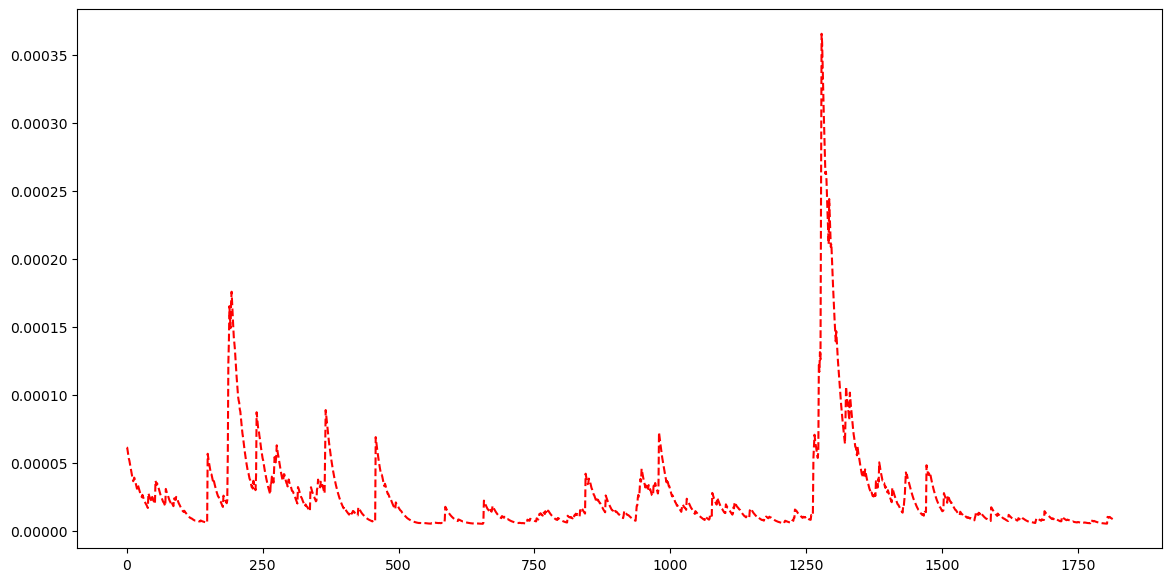

In [23]:
import matplotlib.pyplot as plt
# Plot prediksi dan data aktual untuk data training
plt.figure(figsize=(14, 7))
plt.plot(Fitted_kurs11['V1'], color='red', linestyle='--', label='Predicted Training Data')

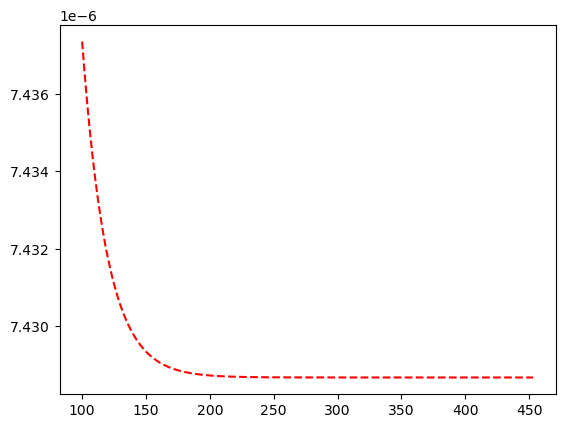

In [25]:
plt.plot(Forecast_kurs11['1974-12-21'].iloc[100:], color='red', linestyle='--', label='Predicted Testing Data')

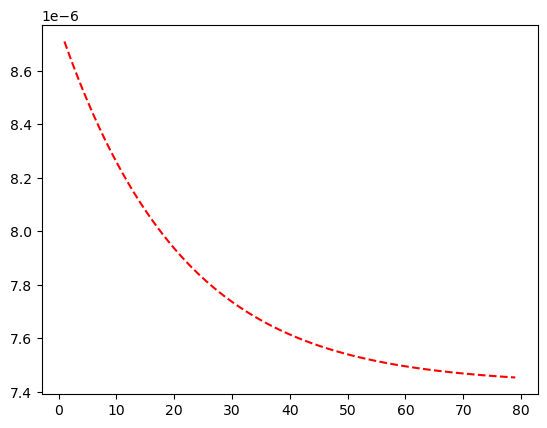

In [27]:
plt.plot(Forecast_kurs.iloc[1:80], color='red', linestyle='--', label='Predicted Testing Data')

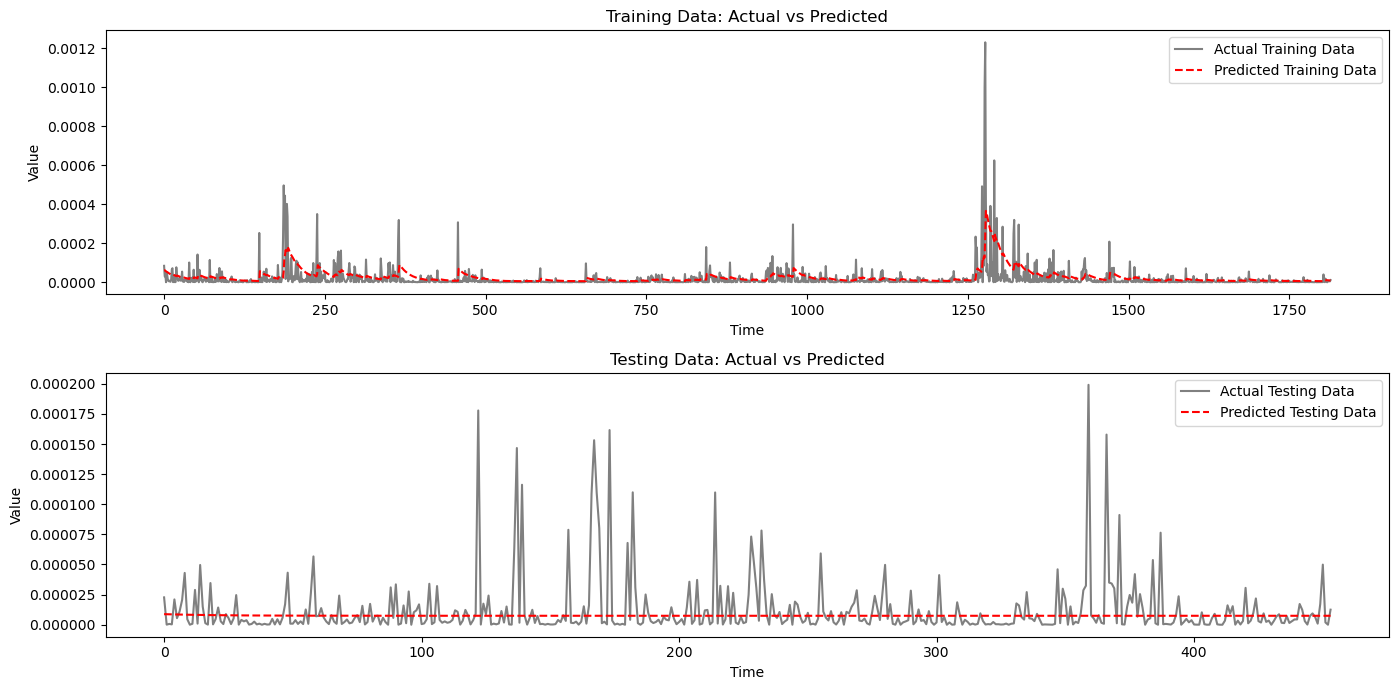

In [29]:
import matplotlib.pyplot as plt

# Plot prediksi dan data aktual untuk data training
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(Actual_train_kurs_GARCH['x'], color='grey', label='Actual Training Data')
plt.plot(Fitted_kurs['V1'], color='red', linestyle='--', label='Predicted Training Data')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot prediksi dan data aktual untuk data testing
plt.subplot(2, 1, 2)
plt.plot(Actual_test_kurs_GARCH['x'], color='grey', label='Actual Testing Data')
plt.plot(Forecast_kurs['Forecast Kurs 11'], color='red', linestyle='--', label='Predicted Testing Data')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


## LSTM

In [34]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.3 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 1.8/390.3 MB 4.4 MB/s eta 0:01:29
   ---------------------------------------- 2.9/390.3 MB 4.5 MB/s eta 0:01:26
   ---------------------------------------- 3.9/390.3 MB 4.6 MB/s eta 0:01:24
    --------------------------------------- 5.0/390.3 MB 4.6 MB/s eta 0:01:23
    --------------------------------------- 6.0/390.3 MB 4.7 MB/s eta 0:01:22
    --------------------------------------- 7.3/390.3 MB 4.9 MB/s eta 0:01:19
    --------------------------------------- 8.4/390.3 MB 5.0 MB/s eta 0:01:17
    --------------------------------------- 9.4/390.3 MB 5.0 MB/s eta 0:01:17
   - -------------------------------------- 10.5/390.3 MB 5.1 MB/s eta 0:01:15
   - -------------------------------------- 11.8/390.3 MB 5.2 MB/s eta 0:01:14
   - -------------------------------------- 13.1/390.3 MB 5.2 MB/s et

In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM

In [40]:
from matplotlib import pyplot as plt

In [44]:
#pembentukan dataset
# Mengubah kolom "Date" menjadi tipe data datetime
kurs['Tanggal Kurs'] = pd.to_datetime(kurs['Tanggal Kurs'], format='%d/%m/%Y')

# Mengambil kolom "Price" sebagai data yang akan diprediksi
data_kurs = kurs['Kurs'].values.reshape(-1, 1)

In [46]:
#Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_kurs)

In [48]:
#Training dan Testing
train_size = int(len(normalized_data) * 0.8)
train_kurs = normalized_data[:train_size, :]
test_kurs = normalized_data[train_size:, :]
print("Jumlah data training kurs full :", len(train_kurs))
print("Jumlah data testing kurs full :", len(test_kurs))

Jumlah data training kurs full : 1815
Jumlah data testing kurs full : 454


In [50]:
# Mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [52]:
look_back = 6  # Jumlah hari sebelumnya yang digunakan untuk prediksi
train_X, train_Y = create_dataset(train_kurs, look_back)
test_X, test_Y = create_dataset(test_kurs, look_back)

# Reshape input untuk memenuhi kebutuhan input LSTM [sampel, waktu, fitur]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [58]:
!pip install scikeras

In [59]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.callbacks import LearningRateScheduler
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## MODEL JADI

In [63]:
from tensorflow.keras.models import Sequential
import tensorflow as tf

### BEST TRAINING (LR=0.001, ADAM, SWISH, 90)

In [66]:
# Define the number of time steps and features
n_steps = 6  # Number of time steps to consider
n_features = normalized_data.shape[1]

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Define calculation functions
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Ensure data are in the correct shape
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], 1))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], 1))

# Check the shapes of the input data
print("train_X shape:", train_X.shape)
print("train_Y shape:", train_Y.shape)
print("test_X shape:", test_X.shape)
print("test_Y shape:", test_Y.shape)

# Fit the model (assuming 'my_model_BTS' is already defined and compiled)
# Define the LSTM network architecture
my_model_BTS = Sequential()
my_model_BTS.add(LSTM(units=40, input_shape=(n_steps, n_features)))
my_model_BTS.add(Dense(1, activation='linear'))
my_model_BTS.add(Dropout(0.15))
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)
my_model_BTS.compile(loss='mse', optimizer=optimizer,metrics = ['mean_squared_error'])

my_model_BTS.fit(train_X, train_Y, epochs=10, batch_size=32, validation_split=0.2)

# Predict on training data
predicted_train_kurs_BTS = my_model_BTS.predict(train_X)
predicted_train_kurs_BTS = scaler.inverse_transform(predicted_train_kurs_BTS)

# Predict on test data
predicted_kurs_BTS = my_model_BTS.predict(test_X)
predicted_kurs_BTS = scaler.inverse_transform(predicted_kurs_BTS)

# Reshape actual values to match the shape of predictions
actual_train_kurs = scaler.inverse_transform(train_Y.reshape(-1, 1))
actual_kurs = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Check the shapes of the actual and predicted values
print("actual_train_kurs shape:", actual_train_kurs.shape)
print("predicted_train_kurs_BTS shape:", predicted_train_kurs_BTS.shape)
print("actual_kurs shape:", actual_kurs.shape)
print("predicted_kurs_BTS shape:", predicted_kurs_BTS.shape)

# Calculate metrics for training data
mape_train_BTS = calculate_mape(actual_train_kurs, predicted_train_kurs_BTS)
mse_train_BTS = calculate_mse(actual_train_kurs, predicted_train_kurs_BTS)
rmse_train_BTS = math.sqrt(mse_train_BTS)
mae_train_BTS = calculate_mae(actual_train_kurs, predicted_train_kurs_BTS)

print("Training Data Metrics:")
print("MAPE (Training):", mape_train_BTS)
print("MSE (Training):", mse_train_BTS)
print("RMSE (Training):", rmse_train_BTS)
print("MAE (Training):", mae_train_BTS)

# Calculate metrics for test data
mape_BTS = calculate_mape(actual_kurs, predicted_kurs_BTS)
mse_BTS = calculate_mse(actual_kurs, predicted_kurs_BTS)
rmse_BTS = math.sqrt(mse_BTS)
mae_BTS = calculate_mae(actual_kurs, predicted_kurs_BTS)

print("Test Data Metrics:")
print("MAPE:", mape_BTS)
print("MSE:", mse_BTS)
print("RMSE:", rmse_BTS)
print("MAE:", mae_BTS)

train_X shape: (1809, 6, 1)
train_Y shape: (1809,)
test_X shape: (448, 6, 1)
test_Y shape: (448,)
Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 1.8128e-04 - val_mean_squared_error: 1.8128e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 1.7531e-04 - val_mean_squared_error: 1.7531e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 1.7490e-04 - val_mean_squared_error: 1.7490e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 3.4246e-04 - val_mean_squared_error: 3.4246e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 3.4384e-04 - val_mean_squared_er

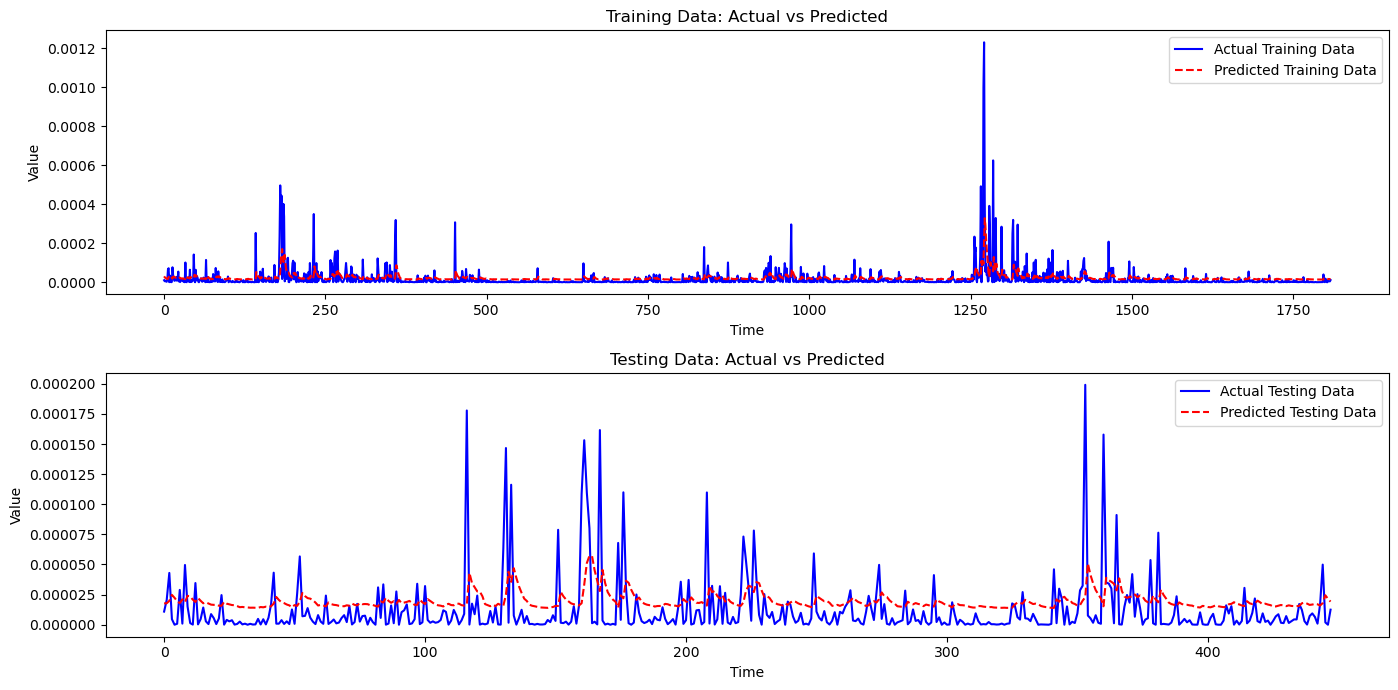

In [69]:
# Plotting data aktual dan prediksi untuk training dan testing
plt.figure(figsize=(14, 7))

# Plot untuk data training
plt.subplot(2, 1, 1)
plt.plot(actual_train_kurs, color='blue', label='Actual Training Data')
plt.plot(predicted_train_kurs_BTS, color='red', linestyle='--', label='Predicted Training Data')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot untuk data testing
plt.subplot(2, 1, 2)
plt.plot(actual_kurs, color='blue', label='Actual Testing Data')
plt.plot(predicted_kurs_BTS, color='red', linestyle='--', label='Predicted Testing Data')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [70]:
import pandas as pd

# Buat DataFrame dari hasil prediksi
df_predicted_train_kurs_BTS = pd.DataFrame(predicted_train_kurs_BTS, columns=['Predicted_Train_Kurs_LSTM'])
df_predicted_kurs_BTS = pd.DataFrame(predicted_kurs_BTS, columns=['Predicted_Test_Kurs_LSTM'])

# Simpan ke CSV
df_predicted_train_kurs_BTS.to_csv('predicted_train_kurs_LSTM.csv', index=False)
df_predicted_kurs_BTS.to_csv('predicted_kurs_LSTM.csv', index=False)


In [71]:
# Memuat kembali data dari CSV
loaded_predicted_train_kurs_BTS = pd.read_csv('predicted_train_kurs_LSTM.csv')
loaded_predicted_kurs_BTS = pd.read_csv('predicted_kurs_LSTM.csv')

loaded_predicted_train_kurs_BTS


,Predicted_Train_Kurs_LSTM
0,0.000030
1,0.000025
2,0.000022
3,0.000020
4,0.000019
...,...
1804,0.000016
1805,0.000017
1806,0.000017
1807,0.000016


## GRU

In [77]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [79]:
# DATA KURS
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=True, sep=';')
kurs

,Tanggal Kurs,Kurs
0,05/01/2015,8.420000e-05
1,06/01/2015,2.990000e-05
2,07/01/2015,3.400000e-05
3,08/01/2015,6.160000e-09
4,09/01/2015,5.150000e-05
...,...,...
2264,22/03/2024,1.720000e-05
2265,25/03/2024,4.990000e-05
2266,26/03/2024,1.940000e-06
2267,27/03/2024,1.600000e-08


In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Membaca data dan memilih kolom yang diperlukan
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=['Tanggal Kurs'], sep=';')
kurs['Tanggal Kurs'] = pd.to_datetime(kurs['Tanggal Kurs'], dayfirst=True)
print("Starting date:", kurs.iloc[0]['Tanggal Kurs'])
print("Ending date:", kurs.iloc[-1]['Tanggal Kurs'])
print("Duration:", kurs.iloc[-1]['Tanggal Kurs'] - kurs.iloc[0]['Tanggal Kurs'])  # Now it will work!
print("Shape of Kurs dataframe:", kurs.shape)

# Mengcopy data kurs untuk referensi
kurs_harga = kurs.copy()
print("Total data for prediction:", kurs.shape[0])

# Menghapus kolom tanggal untuk scaling
del kurs['Tanggal Kurs']

# Melakukan scaling pada data
scaler = MinMaxScaler(feature_range=(0, 1))
kurs_scaled = scaler.fit_transform(np.array(kurs).reshape(-1, 1))
print("Shape after scaling:", kurs_scaled.shape)

# Membuat DataFrame dengan data yang di-scaling
df = pd.DataFrame(columns=['Tanggal Kurs', 'Scaling'])
df['Scaling'] = kurs_scaled.flatten()  # Menggunakan flatten untuk memastikan data dalam bentuk satu dimensi
df['Tanggal Kurs'] = kurs_harga['Tanggal Kurs']
print(df.head())

# Membagi data menjadi training dan testing
training_size = int(len(kurs_scaled) * 0.80)
test_size = len(kurs_scaled) - training_size
train_data, test_data = kurs_scaled[0:training_size, :], kurs_scaled[training_size:len(kurs_scaled), :]
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Starting date: 2015-01-05 00:00:00
Ending date: 2024-03-28 00:00:00
Duration: 3370 days 00:00:00
Shape of Kurs dataframe: (2269, 2)
Total data for prediction: 2269
Shape after scaling: (2269, 1)
  Tanggal Kurs   Scaling
0   2015-01-05  0.068410
1   2015-01-06  0.024293
2   2015-01-07  0.027624
3   2015-01-08  0.000005
4   2015-01-09  0.041842
Train data shape: (1815, 1)
Test data shape: (454, 1)


In [85]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
time_step = 6
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train full: ", X_train.shape)
print("y_train full: ", y_train.shape)
print("X_test full: ", X_test.shape)
print("y_test full", y_test.shape)

X_train full:  (1808, 6)
y_train full:  (1808,)
X_test full:  (447, 6)
y_test full (447,)


In [89]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train full: ", X_train.shape)
print("X_test full: ", X_test.shape)

X_train full:  (1808, 6, 1)
X_test full:  (447, 6, 1)


In [91]:
# DATA KURS
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=True, sep=';')
kurs

,Tanggal Kurs,Kurs
0,05/01/2015,8.420000e-05
1,06/01/2015,2.990000e-05
2,07/01/2015,3.400000e-05
3,08/01/2015,6.160000e-09
4,09/01/2015,5.150000e-05
...,...,...
2264,22/03/2024,1.720000e-05
2265,25/03/2024,4.990000e-05
2266,26/03/2024,1.940000e-06
2267,27/03/2024,1.600000e-08


In [93]:
from pandas import DataFrame
train_data = df.loc[:training_size, :]
test_data = df.loc[training_size:, :]

In [95]:
train_data

,Tanggal Kurs,Scaling
0,2015-01-05,0.068410
1,2015-01-06,0.024293
2,2015-01-07,0.027624
3,2015-01-08,0.000005
4,2015-01-09,0.041842
...,...,...
1811,2022-05-17,0.004404
1812,2022-05-18,0.003884
1813,2022-05-19,0.003632
1814,2022-05-20,0.009018


In [99]:
!pip install keras_tuner

In [100]:
import tensorflow as tf
import keras_tuner as kt

In [103]:
from keras_tuner import HyperParameters as hp
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import numpy as np
import random

In [105]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Fungsi untuk menghitung MAPE, MSE, RMSE, dan MAE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

def calculate_rmse(actual, predicted):
    return np.sqrt(calculate_mse(actual, predicted))

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Fungsi untuk mengatur seed untuk reprodusibilitas
def set_seed(seed=16):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

# Definisikan hyperparameter terbaik
best_learning_rate = 0.0001
best_units = 64

# Membangun model dengan hyperparameter terbaik
def build_best_model():
    model = Sequential()
    model.add(GRU(units=best_units,
                  activation='relu',
                  input_shape=(time_step, 1)))
    model.add(Dense(1))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    return model

# Membangun model dengan hyperparameter terbaik
best_model = build_best_model()

# Melatih model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# Prediksi pada data training dan testing
predicted_train_GRU = best_model.predict(X_train)
predicted_test_GRU = best_model.predict(X_test)

# Mengembalikan data ke skala asli
actual_train_GRU = scaler.inverse_transform(y_train.reshape(-1, 1))
predicted_train_GRU = scaler.inverse_transform(predicted_train_GRU)
actual_test_GRU = scaler.inverse_transform(y_test.reshape(-1, 1))
predicted_test_GRU = scaler.inverse_transform(predicted_test_GRU)

# Menghitung metrik evaluasi untuk data training
mape_train_GRU = calculate_mape(actual_train_GRU, predicted_train_GRU)
mse_train_GRU = calculate_mse(actual_train_GRU, predicted_train_GRU)
rmse_train_GRU = calculate_rmse(actual_train_GRU, predicted_train_GRU)
mae_train_GRU = calculate_mae(actual_train_GRU, predicted_train_GRU)

print("Training Metrics:")
print(f"MAPE: {mape_train_GRU}")
print(f"MSE: {mse_train_GRU}")
print(f"RMSE: {rmse_train_GRU}")
print(f"MAE: {mae_train_GRU}")

# Menghitung metrik evaluasi untuk data testing
mape_test_GRU = calculate_mape(actual_test_GRU, predicted_test_GRU)
mse_test_GRU = calculate_mse(actual_test_GRU, predicted_test_GRU)
rmse_test_GRU = calculate_rmse(actual_test_GRU, predicted_test_GRU)
mae_test_GRU = calculate_mae(actual_test_GRU, predicted_test_GRU)

print("Testing Metrics:")
print(f"MAPE: {mape_test_GRU}")
print(f"MSE: {mse_test_GRU}")
print(f"RMSE: {rmse_test_GRU}")
print(f"MAE: {mae_test_GRU}")


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 2.7882e-04 - val_mean_squared_error: 2.7882e-04
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 2.5241e-04 - val_mean_squared_error: 2.5241e-04
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 2.6252e-04 - val_mean_squared_error: 2.6252e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 2.6106e-04 - val_mean_squared_error: 2.6106e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 2.5811e-04 - val_mean_squared_error: 2.5811e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 2.5417e-04 - val_mean_squared_error: 2.5417e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_s

In [106]:
actual_train_GRU

array([[1.01e-05],
       [4.94e-06],
       [8.63e-06],
       ...,
       [5.42e-06],
       [4.78e-06],
       [4.47e-06]])

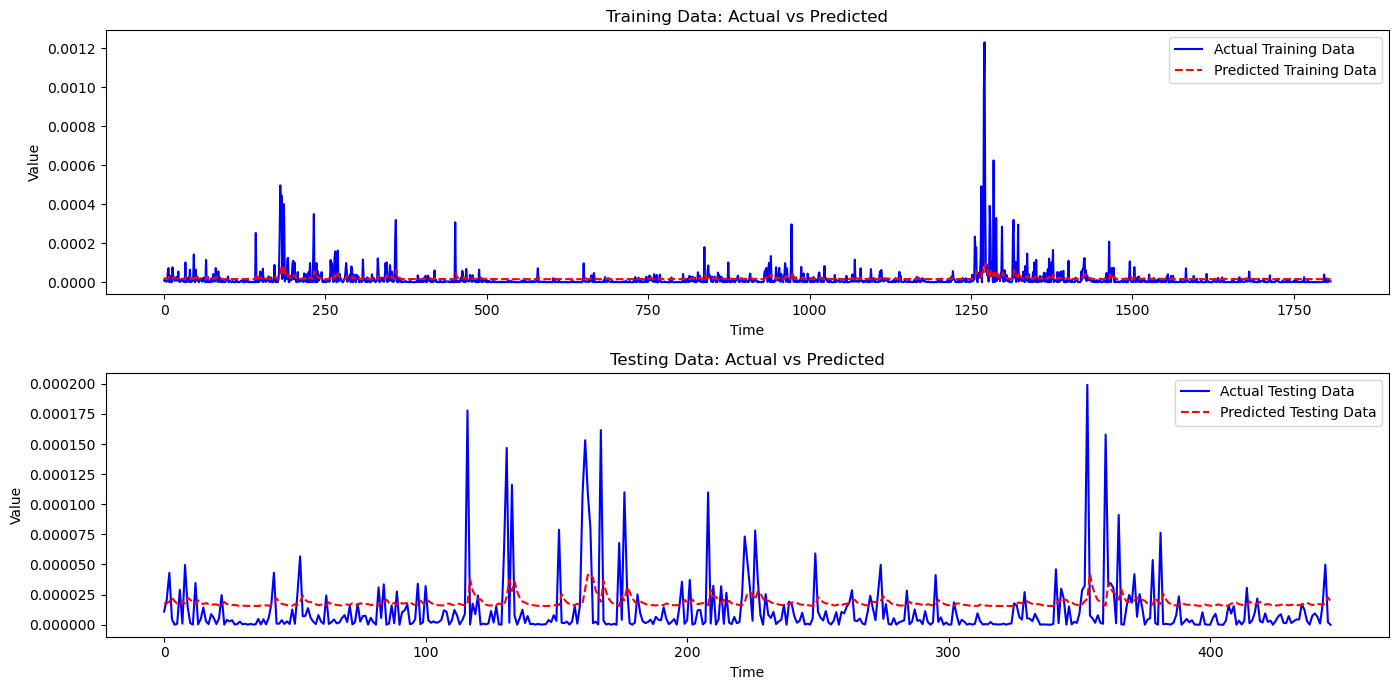

In [107]:
import matplotlib.pyplot as plt

# Plot prediksi dan data aktual untuk data training
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(actual_train_GRU, color='blue', label='Actual Training Data')
plt.plot(predicted_train_GRU, color='red', linestyle='--', label='Predicted Training Data')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Plot prediksi dan data aktual untuk data testing
plt.subplot(2, 1, 2)
plt.plot(actual_test_GRU, color='blue', label='Actual Testing Data')
plt.plot(predicted_test_GRU, color='red', linestyle='--', label='Predicted Testing Data')
plt.title('Testing Data: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [108]:
actual_train_GRU

array([[1.01e-05],
       [4.94e-06],
       [8.63e-06],
       ...,
       [5.42e-06],
       [4.78e-06],
       [4.47e-06]])

In [117]:
import pandas as pd

# Buat DataFrame dari hasil prediksi
df_predicted_train_kurs_GRU = pd.DataFrame(predicted_train_GRU, columns=['Predicted_Train_Kurs_GRU'])
df_predicted_test_kurs_GRU = pd.DataFrame(predicted_test_GRU, columns=['Predicted_Test_Kurs_GRU'])

# Simpan ke CSV
df_predicted_train_kurs_GRU.to_csv('predicted_train_kurs_GRU.csv', index=False)
df_predicted_test_kurs_GRU.to_csv('predicted_test_kurs_GRU.csv', index=False)


In [119]:
# Memuat kembali data dari CSV
loaded_predicted_train_kurs_GRU = pd.read_csv('predicted_train_kurs_GRU.csv')
loaded_predicted_test_kurs_GRU = pd.read_csv('predicted_test_kurs_GRU.csv')

loaded_predicted_train_kurs_GRU

,Predicted_Train_Kurs_GRU
0,0.000024
1,0.000021
2,0.000019
3,0.000018
4,0.000017
...,...
1803,0.000017
1804,0.000016
1805,0.000017
1806,0.000017


## CNN

In [124]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import t
from statsmodels.tsa.stattools import adfuller
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [126]:
# DATA KURS
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=True, sep=';')
kurs

,Tanggal Kurs,Kurs
0,05/01/2015,8.420000e-05
1,06/01/2015,2.990000e-05
2,07/01/2015,3.400000e-05
3,08/01/2015,6.160000e-09
4,09/01/2015,5.150000e-05
...,...,...
2264,22/03/2024,1.720000e-05
2265,25/03/2024,4.990000e-05
2266,26/03/2024,1.940000e-06
2267,27/03/2024,1.600000e-08


In [128]:
# Pembagian Data Kurs Bagian 1
train_size = int(len(kurs) * 0.8)
train_data = kurs.iloc[:train_size]
test_data = kurs.iloc[train_size:]


In [132]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM

In [136]:
#pembentukan dataset
# Mengubah kolom "Date" menjadi tipe data datetime
kurs['Tanggal Kurs'] = pd.to_datetime(kurs['Tanggal Kurs'], format='%d/%m/%Y')

# Mengambil kolom "Price" sebagai data yang akan diprediksi
data_kurs = kurs['Kurs'].values.reshape(-1, 1)

In [138]:
#Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_kurs)

In [140]:
#Training dan Testing
train_size = int(len(normalized_data) * 0.8)
train_kurs = normalized_data[:train_size, :]
test_kurs = normalized_data[train_size:, :]
print("Jumlah data training kurs full:", len(train_data))
print("Jumlah data testing kurs full:", len(test_data))

Jumlah data training kurs full: 1815
Jumlah data testing kurs full: 454


In [142]:
# Mengubah data menjadi bentuk yang sesuai untuk LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [144]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Membaca data dari file CSV
kurs = pd.read_csv('Kurs Terbaru.csv', parse_dates=['Tanggal Kurs'], sep=';')
kurs['Tanggal Kurs'] = pd.to_datetime(kurs['Tanggal Kurs'], dayfirst=True)

# Menampilkan tanggal awal, akhir, dan durasi data
print("Starting date:", kurs.iloc[0]['Tanggal Kurs'])
print("Ending date:", kurs.iloc[-1]['Tanggal Kurs'])
print("Duration:", kurs.iloc[-1]['Tanggal Kurs'] - kurs.iloc[0]['Tanggal Kurs'])  # Now it will work!
print("Shape of Kurs dataframe:", kurs.shape)

# Pembagian Data Kurs Bagian 1
train_size = int(len(kurs) * 0.8)
train_data = kurs.iloc[:train_size]
test_data = kurs.iloc[train_size:]

# Mengubah kolom "Tanggal Kurs" menjadi tipe data datetime
kurs['Tanggal Kurs'] = pd.to_datetime(kurs['Tanggal Kurs'])

# Mengambil kolom "Kurs" sebagai data yang akan diprediksi
data_kurs = kurs['Kurs'].values.reshape(-1, 1)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data_kurs)

# Membagi data yang telah di-normalisasi menjadi training dan testing
train_size = int(len(normalized_data) * 0.8)
train_kurs = normalized_data[:train_size, :]
test_kurs = normalized_data[train_size:, :]

# Menampilkan jumlah data training dan testing
print("Jumlah data training kurs full:", len(train_data))
print("Jumlah data testing kurs full:", len(test_data))


Starting date: 2015-01-05 00:00:00
Ending date: 2024-03-28 00:00:00
Duration: 3370 days 00:00:00
Shape of Kurs dataframe: (2269, 2)
Jumlah data training kurs full: 1815
Jumlah data testing kurs full: 454


In [146]:
# CNN 1D

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [148]:
look_back = 6  # Jumlah hari sebelumnya yang digunakan untuk prediksi
train_X, train_Y = create_dataset(train_kurs, look_back)
test_X, test_Y = create_dataset(test_kurs, look_back)

# Reshape input untuk memenuhi kebutuhan input LSTM [sampel, waktu, fitur]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
print('train_X shape full: ',train_X.shape)
print('test_X shape full: ',test_X.shape)

train_X shape full:  (1809, 6, 1)
test_X shape full:  (448, 6, 1)


In [150]:
from tensorflow.keras.models import Sequential

In [152]:
input_dim=6

In [154]:
es = EarlyStopping(monitor='val_loss', patience=5)

In [156]:
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import pandas as pd
import matplotlib.pyplot as plt
import math

# Set seed for reproducibility
seed = 16
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Define CNN model with the best hyperparameters
def best_CNN_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=38, kernel_size=2, padding="same", activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2, padding="same"))
    model.add(Dropout(0.104228))
    
    model.add(Conv1D(filters=76, kernel_size=2, padding="same", activation='relu'))
    model.add(MaxPooling1D(pool_size=2, padding="same"))
    model.add(Dropout(0.104228))
    
    model.add(Conv1D(filters=152, kernel_size=2, padding="same", activation='relu'))
    model.add(MaxPooling1D(pool_size=2, padding="same"))
    model.add(Dropout(0.104228))
    
    model.add(Conv1D(filters=304, kernel_size=2, padding="same", activation='relu'))
    model.add(MaxPooling1D(pool_size=2, padding="same"))
    model.add(Dropout(0.104228))
    
    model.add(Flatten())
    
    for _ in range(5):
        model.add(Dense(58, activation='relu'))
        model.add(Dropout(0.128298))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mean_squared_error"])
    
    return model


In [158]:
# Create and train the model with the best hyperparameters
best_model = best_CNN_model(train_X.shape[1:])
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=10,
    verbose=0,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0
)

history = best_model.fit(train_X, train_Y, epochs=10, batch_size=16, validation_split=0.2, callbacks=[reduce_lr], verbose=0)


In [159]:
# Evaluate the model on the training and testing datasets
train_mse_CNN = best_model.evaluate(train_X, train_Y, verbose=0)[1]
test_mse_CNN = best_model.evaluate(test_X, test_Y, verbose=0)[1]

# Print the training and testing MSE
print(f"Train MSE: {train_mse_CNN}")
print(f"Test MSE: {test_mse_CNN}")

# Make predictions on training and testing data
predicted_train_CNN = best_model.predict(train_X)
predicted_test_CNN = best_model.predict(test_X)

# Inverse transform the predictions if using a scaler
predicted_train_CNN = scaler.inverse_transform(predicted_train_CNN)
predicted_test_CNN = scaler.inverse_transform(predicted_test_CNN)
actual_train_CNN = scaler.inverse_transform(train_Y.reshape(-1, 1))
actual_test_CNN = scaler.inverse_transform(test_Y.reshape(-1, 1))

# Calculate additional metrics for training data
train_mape_CNN = np.mean(np.abs((actual_train_CNN - predicted_train_CNN) / actual_train_CNN)) * 100
train_rmse_CNN = math.sqrt(train_mse_CNN)
train_mae_CNN = np.mean(np.abs(actual_train_CNN - predicted_train_CNN))

# Calculate additional metrics for testing data
test_mape_CNN = np.mean(np.abs((actual_test_CNN - predicted_test_CNN) / actual_test_CNN)) * 100
test_rmse_CNN = math.sqrt(test_mse_CNN)
test_mae_CNN = np.mean(np.abs(actual_test_CNN - predicted_test_CNN))

# Print the metrics
print(f"Training Metrics: MAPE={train_mape_CNN}, MSE={train_mse_CNN}, RMSE={train_rmse_CNN}, MAE={train_mae_CNN}")
print(f"Testing Metrics: MAPE={test_mape_CNN}, MSE={test_mse_CNN}, RMSE={test_rmse_CNN}, MAE={test_mae_CNN}")


Train MSE: 0.0024519830476492643
Test MSE: 0.0004802638723049313
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Training Metrics: MAPE=inf, MSE=0.0024519830476492643, RMSE=0.0495175024375146, MAE=1.761920975970521e-05
Testing Metrics: MAPE=inf, MSE=0.0004802638723049313, RMSE=0.021914923506709563, MAE=1.1280695475547463e-05


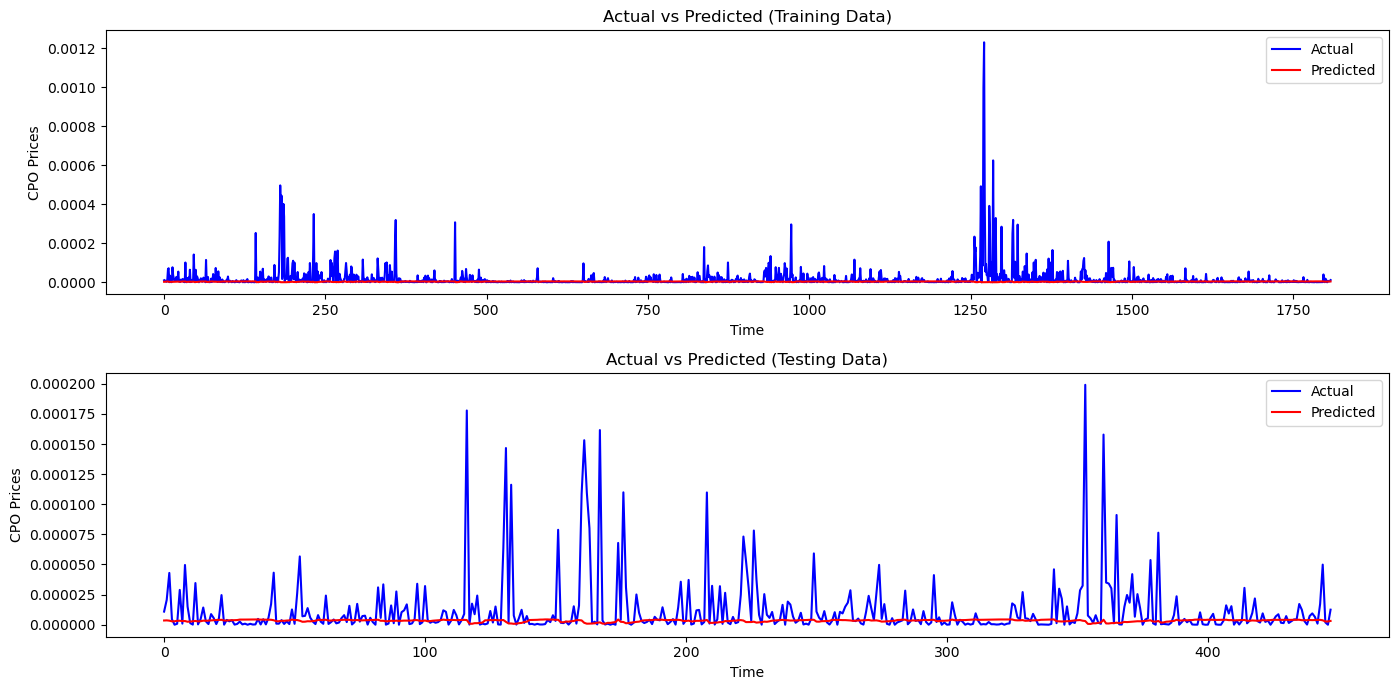

In [160]:
plt.figure(figsize=(14, 7))

# Plot for training data
plt.subplot(2,1,1)
plt.plot(actual_train_CNN, label="Actual", color='blue')
plt.plot(predicted_train_CNN, label="Predicted", color='red')
plt.title('Actual vs Predicted (Training Data)')
plt.xlabel('Time')
plt.ylabel('CPO Prices')
plt.legend()

# Plot for testing data
plt.subplot(2,1,2)
plt.plot(actual_test_CNN, label="Actual", color='blue')
plt.plot(predicted_test_CNN, label="Predicted", color='red')
plt.title('Actual vs Predicted (Testing Data)')
plt.xlabel('Time')
plt.ylabel('CPO Prices')
plt.legend()

plt.tight_layout()
plt.show()


In [161]:
import pandas as pd

# Buat DataFrame dari hasil prediksi
df_predicted_train_kurs_CNN = pd.DataFrame(predicted_train_CNN, columns=['Predicted_Train_Kurs_CNN'])
df_predicted_test_kurs_CNN = pd.DataFrame(predicted_test_CNN, columns=['Predicted_Test_Kurs_CNN'])

# Simpan ke CSV
df_predicted_train_kurs_CNN.to_csv('predicted_train_kurs_CNN.csv', index=False)
df_predicted_test_kurs_CNN.to_csv('predicted_test_kurs_CNN.csv', index=False)


In [162]:
# Memuat kembali data dari CSV
loaded_predicted_train_kurs_CNN = pd.read_csv('predicted_train_kurs_CNN.csv')
loaded_predicted_test_kurs_CNN = pd.read_csv('predicted_test_kurs_CNN.csv')

loaded_predicted_train_kurs_CNN

,Predicted_Train_Kurs_CNN
0,0.000002
1,0.000003
2,0.000003
3,0.000003
4,0.000003
...,...
1804,0.000004
1805,0.000004
1806,0.000004
1807,0.000004


# PLOT GABUNGAN

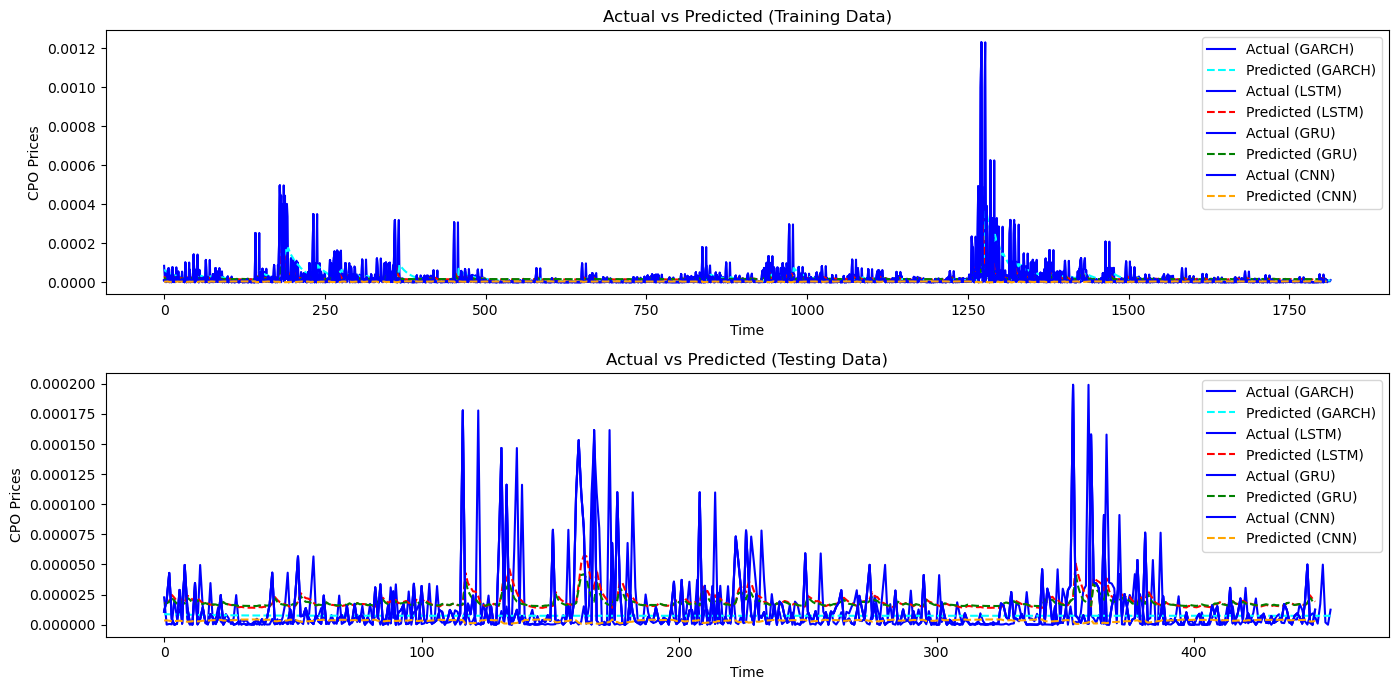

In [315]:
## GABUNGAN PLOT AKTUAL VS PREDIKSI (ACTUAL SEMUANYA)
import numpy as np
import matplotlib.pyplot as plt

# Asumsi: Prediksi dan nilai aktual dari keempat metode telah disimpan dalam variabel berikut
# GARCH
actual_train_garch =Actual_train_kurs_GARCH['x']
predicted_train_garch = Fitted_kurs
actual_test_garch = Actual_test_kurs_GARCH['x']
predicted_test_garch = Forecast_kurs

# LSTM
actual_train_lstm = actual_train_kurs
predicted_train_lstm = predicted_train_kurs_BTS
actual_test_lstm = actual_kurs
predicted_test_lstm = predicted_kurs_BTS

# GRU
actual_train_gru = actual_train_GRU
predicted_train_gru = predicted_train_GRU
actual_test_gru = actual_test_GRU
predicted_test_gru = predicted_test_GRU

# CNN
actual_train_cnn = actual_train_CNN
predicted_train_cnn = predicted_train_CNN
actual_test_cnn = actual_test_CNN
predicted_test_cnn = predicted_test_CNN

# Plot training data
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(actual_train_garch, label="Actual (GARCH)", color='blue')
plt.plot(predicted_train_garch, label="Predicted (GARCH)", color='cyan', linestyle='dashed')
plt.plot(actual_train_lstm, label="Actual (LSTM)", color='blue')
plt.plot(predicted_train_lstm, label="Predicted (LSTM)", color='red', linestyle='dashed')
plt.plot(actual_train_gru, label="Actual (GRU)", color='blue')
plt.plot(predicted_train_gru, label="Predicted (GRU)", color='green', linestyle='dashed')
plt.plot(actual_train_cnn, label="Actual (CNN)", color='blue')
plt.plot(predicted_train_cnn, label="Predicted (CNN)", color='orange', linestyle='dashed')
plt.title('Actual vs Predicted (Training Data)')
plt.xlabel('Time')
plt.ylabel('CPO Prices')
plt.legend()

# Plot testing data
plt.subplot(2, 1, 2)
plt.plot(actual_test_garch, label="Actual (GARCH)", color='blue')
plt.plot(predicted_test_garch, label="Predicted (GARCH)", color='cyan', linestyle='dashed')
plt.plot(actual_test_lstm, label="Actual (LSTM)", color='blue')
plt.plot(predicted_test_lstm, label="Predicted (LSTM)", color='red', linestyle='dashed')
plt.plot(actual_test_gru, label="Actual (GRU)", color='blue')
plt.plot(predicted_test_gru, label="Predicted (GRU)", color='green', linestyle='dashed')
plt.plot(actual_test_cnn, label="Actual (CNN)", color='blue')
plt.plot(predicted_test_cnn, label="Predicted (CNN)", color='orange', linestyle='dashed')
plt.title('Actual vs Predicted (Testing Data)')
plt.xlabel('Time')
plt.ylabel('CPO Prices')
plt.legend()

plt.tight_layout()
plt.show()


In [316]:
actual_train_garch =Actual_train_kurs_GARCH
actual_test_garch = Actual_test_kurs_GARCH

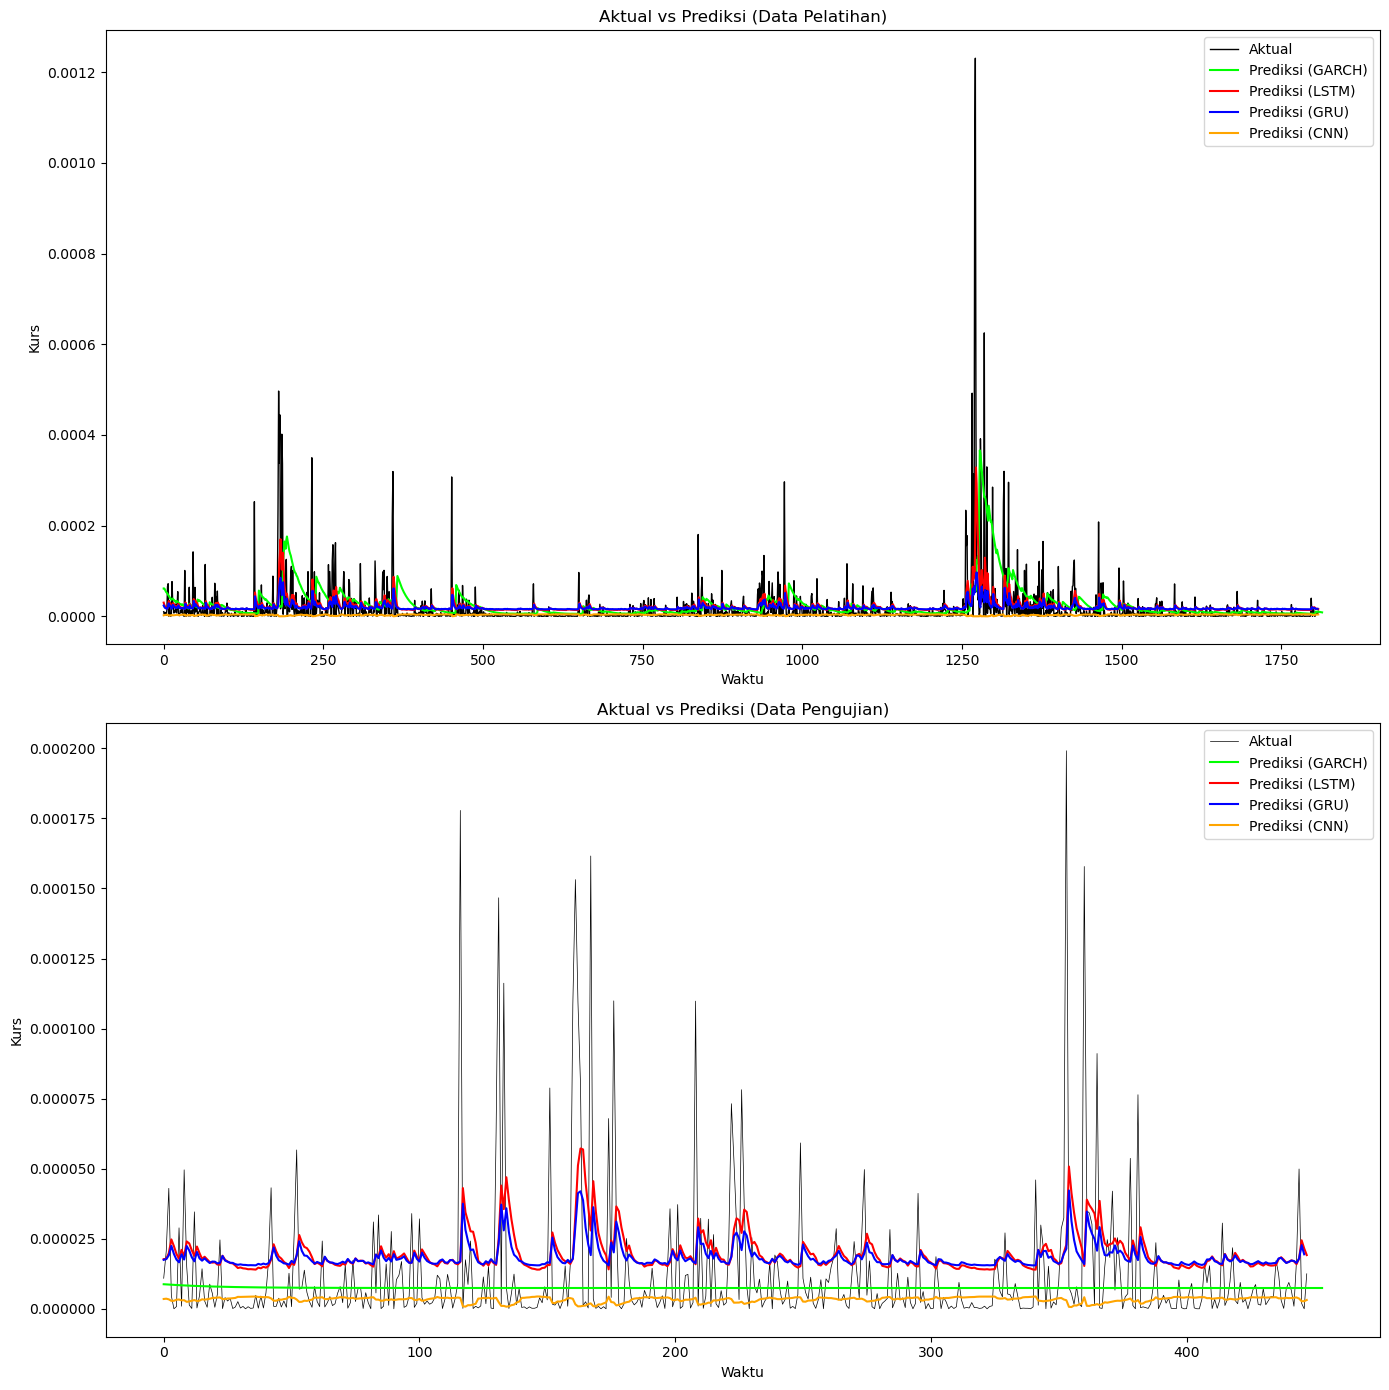

In [317]:
## GABUNGAN PLOT AKTUAL VS PREDIKSI (ACTUAL SATU)
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memotong atau menambahkan data agar memiliki panjang yang sama
def selaraskan_panjang(actual_data, *predicted_data):
    min_length = min(len(actual_data), *[len(pd) for pd in predicted_data])
    truncated_actual = actual_data[:min_length]
    truncated_predicted = [pd[:min_length] for pd in predicted_data]
    return truncated_actual, truncated_predicted

# Selaraskan panjang data pelatihan
actual_train_garch, truncated_train_data_garch = selaraskan_panjang(actual_train_garch, predicted_train_garch)
actual_train_lstm, truncated_train_data_lstm = selaraskan_panjang(actual_train_lstm, predicted_train_lstm)
actual_train_gru, truncated_train_data_gru = selaraskan_panjang(actual_train_gru, predicted_train_gru)
actual_train_cnn, truncated_train_data_cnn = selaraskan_panjang(actual_train_cnn, predicted_train_cnn)

# Selaraskan panjang data pengujian
actual_test_garch, truncated_test_data_garch = selaraskan_panjang(actual_test_garch, predicted_test_garch)
actual_test_lstm, truncated_test_data_lstm = selaraskan_panjang(actual_test_lstm, predicted_test_lstm)
actual_test_gru, truncated_test_data_gru = selaraskan_panjang(actual_test_gru, predicted_test_gru)
actual_test_cnn, truncated_test_data_cnn = selaraskan_panjang(actual_test_cnn, predicted_test_cnn)

# Plot data pelatihan
plt.figure(figsize=(14, 14))

# Plot Data Pelatihan
plt.subplot(2, 1, 1)
plt.plot(actual_train_lstm, label="Aktual", color='black', linewidth=1)
plt.plot(truncated_train_data_garch[0], label="Prediksi (GARCH)", color='lime')
plt.plot(truncated_train_data_lstm[0], label="Prediksi (LSTM)", color='red')
plt.plot(truncated_train_data_gru[0], label="Prediksi (GRU)", color='blue')
plt.plot(truncated_train_data_cnn[0], label="Prediksi (CNN)", color='orange')
plt.title('Aktual vs Prediksi (Data Pelatihan)')
plt.xlabel('Waktu')
plt.ylabel('Kurs')
plt.legend()

# Plot data pengujian
plt.subplot(2, 1, 2)
plt.plot(actual_test_lstm, label="Aktual", color='black',linewidth=0.5)
plt.plot(truncated_test_data_garch[0], label="Prediksi (GARCH)", color='lime')
plt.plot(truncated_test_data_lstm[0], label="Prediksi (LSTM)", color='red')
plt.plot(truncated_test_data_gru[0], label="Prediksi (GRU)", color='blue')
plt.plot(truncated_test_data_cnn[0], label="Prediksi (CNN)", color='orange')
plt.title('Aktual vs Prediksi (Data Pengujian)')
plt.xlabel('Waktu')
plt.ylabel('Kurs')
plt.legend()

plt.tight_layout()
plt.show()


In [318]:
truncated_train_data_garch[0].to_numpy().reshape(-1,1)

array([[6.14e-05],
       [6.13e-05],
       [5.85e-05],
       ...,
       [9.18e-06],
       [8.93e-06],
       [8.69e-06]])

In [319]:
truncated_train_data_garch

[            V1
 0     0.000061
 1     0.000061
 2     0.000058
 3     0.000056
 4     0.000053
 ...        ...
 1810  0.000010
 1811  0.000009
 1812  0.000009
 1813  0.000009
 1814  0.000009
 
 [1815 rows x 1 columns]]

In [320]:
actual_train_garch

,Unnamed: 0,x
0,1,8.420000e-05
1,2,2.990000e-05
2,3,3.400000e-05
3,4,6.160000e-09
4,5,5.150000e-05
...,...,...
1810,1811,7.170000e-06
1811,1812,5.420000e-06
1812,1813,4.780000e-06
1813,1814,4.470000e-06


In [323]:
actual_train_garch1=actual_train_garch['x'].to_numpy().reshape(-1,1)
actual_train_garch1

array([[8.42e-05],
       [2.99e-05],
       [3.40e-05],
       ...,
       [4.78e-06],
       [4.47e-06],
       [1.11e-05]])

In [324]:
truncated_train_data_garch1=truncated_train_data_garch[0].to_numpy().reshape(-1,1)
truncated_train_data_garch1

array([[6.14e-05],
       [6.13e-05],
       [5.85e-05],
       ...,
       [9.18e-06],
       [8.93e-06],
       [8.69e-06]])

In [325]:
truncated_train_data_gru

[array([[2.3762615e-05],
        [2.0703394e-05],
        [1.8656243e-05],
        ...,
        [1.6685377e-05],
        [1.6698325e-05],
        [1.6606607e-05]], dtype=float32)]

Dimensi actual_train_garch1: (1808,)
Dimensi actual_train_lstm: (1808, 1)
Dimensi actual_train_cnn: (1808, 1)
Dimensi actual_train_gru: (1808, 1)
Dimensi truncated_train_data_garch1: (1815, 1)
Dimensi truncated_train_data_lstm: (1, 1809, 1)
Dimensi truncated_train_data_cnn: (1, 1809, 1)
Dimensi truncated_train_data_gru: (1, 1808, 1)
Dimensi lower_bound_garch: (1815,)
Dimensi upper_bound_garch: (1815,)
Dimensi lower_bound_lstm: (1809,)
Dimensi upper_bound_lstm: (1809,)
Dimensi lower_bound_cnn: (1809,)
Dimensi upper_bound_cnn: (1809,)
Dimensi lower_bound_gru: (1808,)
Dimensi upper_bound_gru: (1808,)


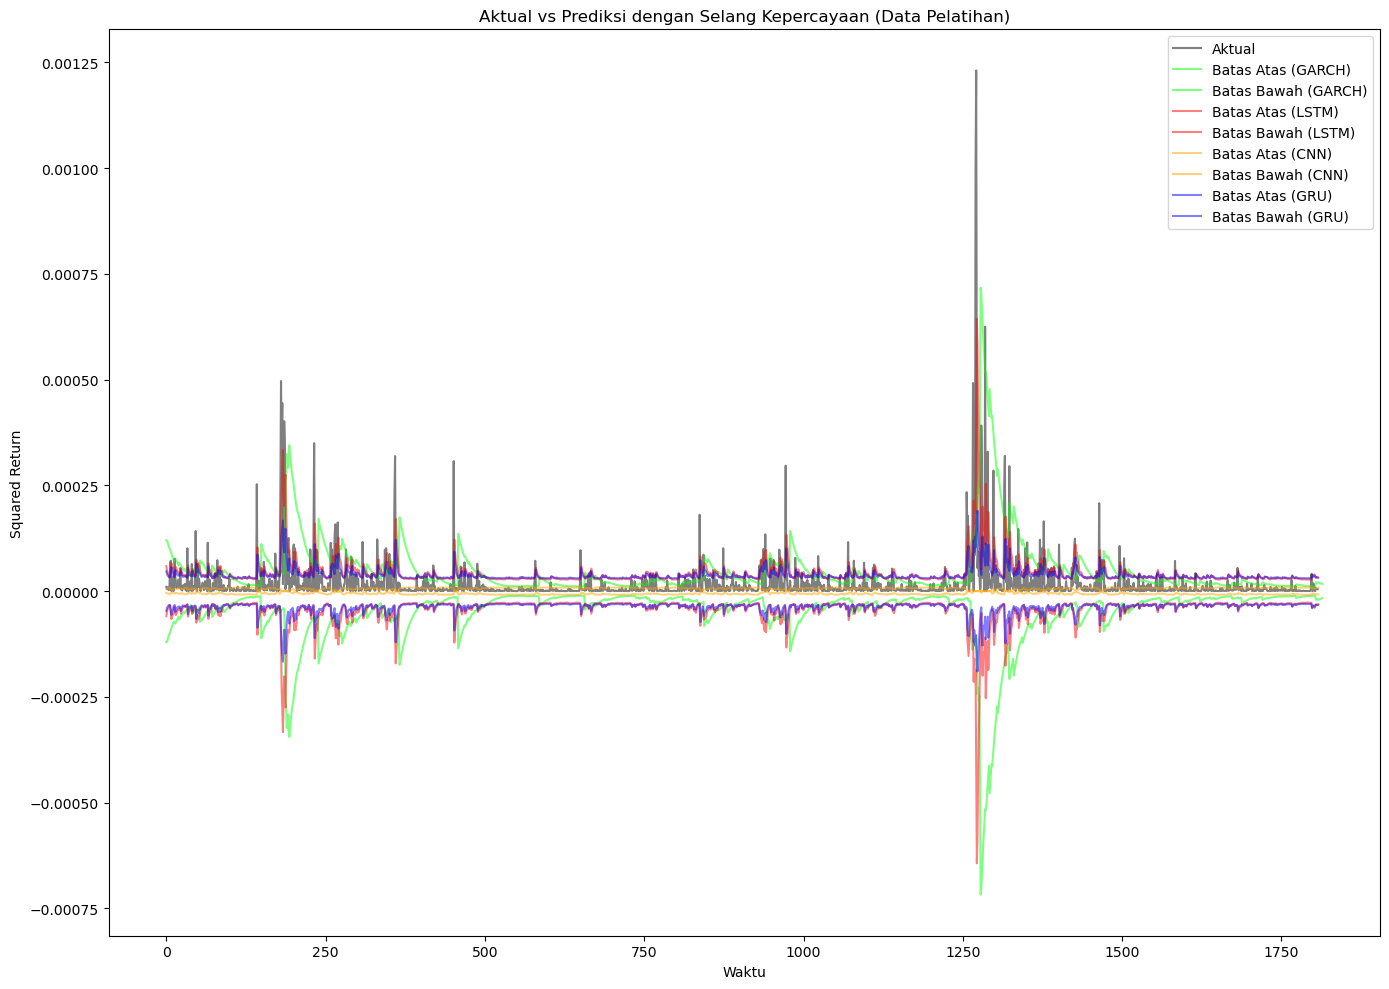

In [330]:
import numpy as np
import matplotlib.pyplot as plt

# Pastikan data dalam bentuk array NumPy (convert jika perlu)
actual_train_garch2 = np.array(actual_train_garch1)
actual_train_lstm1 = np.array(actual_train_lstm)
actual_train_cnn1 = np.array(actual_train_cnn)
actual_train_gru1 = np.array(actual_train_gru)
truncated_train_data_garch2 = np.array(truncated_train_data_garch1)
truncated_train_data_lstm1 = np.array(truncated_train_data_lstm)
truncated_train_data_cnn1 = np.array(truncated_train_data_cnn)
truncated_train_data_gru1 = np.array(truncated_train_data_gru)

# Mengambil kolom pertama dari actual_train_garch1 jika data tersebut memiliki dua kolom
if actual_train_garch2.ndim == 2:
    actual_train_garch2 = actual_train_garch2[:, 0]  # Mengubah dimensi menjadi (454,)

# Menentukan panjang yang konsisten, misalnya 447 (panjang terkecil)
min_len = 1808

# Memotong semua data agar memiliki panjang yang sama
actual_train_garch2 = actual_train_garch2[:min_len]
actual_train_lstm1 = actual_train_lstm1[:min_len]
actual_train_cnn1 = actual_train_cnn1[:min_len]
actual_train_gru1 = actual_train_gru1[:min_len]
truncated_train_data_garch12= truncated_train_data_lstm1[:min_len]
truncated_train_data_cnn1 = truncated_train_data_cnn1[:min_len]
truncated_train_data_gru1 = truncated_train_data_gru1[:min_len]

# Memeriksa dimensi data
print(f"Dimensi actual_train_garch1: {actual_train_garch2.shape}")
print(f"Dimensi actual_train_lstm: {actual_train_lstm1.shape}")
print(f"Dimensi actual_train_cnn: {actual_train_cnn1.shape}")
print(f"Dimensi actual_train_gru: {actual_train_gru1.shape}")
print(f"Dimensi truncated_train_data_garch1: {truncated_train_data_garch2.shape}")
print(f"Dimensi truncated_train_data_lstm: {truncated_train_data_lstm1.shape}")
print(f"Dimensi truncated_train_data_cnn: {truncated_train_data_cnn1.shape}")
print(f"Dimensi truncated_train_data_gru: {truncated_train_data_gru1.shape}")

# Z-score untuk selang kepercayaan 95%
confidence_interval = 1.96

# Selang kepercayaan untuk setiap model
lower_bound_garch = 0 - confidence_interval * truncated_train_data_garch2
upper_bound_garch = 0 + confidence_interval * truncated_train_data_garch2

lower_bound_lstm = 0 - confidence_interval * truncated_train_data_lstm1
upper_bound_lstm = 0 + confidence_interval * truncated_train_data_lstm1

lower_bound_cnn = 0 - confidence_interval * truncated_train_data_cnn1
upper_bound_cnn = 0 + confidence_interval * truncated_train_data_cnn1

lower_bound_gru = 0 - confidence_interval * truncated_train_data_gru1
upper_bound_gru = 0 + confidence_interval * truncated_train_data_gru1

# Pastikan lower_bound_* dan upper_bound_* memiliki dimensi yang benar
lower_bound_garch = np.reshape(lower_bound_garch, -1)
upper_bound_garch = np.reshape(upper_bound_garch, -1)

lower_bound_lstm = np.reshape(lower_bound_lstm, -1)
upper_bound_lstm = np.reshape(upper_bound_lstm, -1)

lower_bound_cnn = np.reshape(lower_bound_cnn, -1)
upper_bound_cnn = np.reshape(upper_bound_cnn, -1)

lower_bound_gru = np.reshape(lower_bound_gru, -1)
upper_bound_gru = np.reshape(upper_bound_gru, -1)

# Memastikan dimensi yang konsisten
print(f"Dimensi lower_bound_garch: {lower_bound_garch.shape}")
print(f"Dimensi upper_bound_garch: {upper_bound_garch.shape}")
print(f"Dimensi lower_bound_lstm: {lower_bound_lstm.shape}")
print(f"Dimensi upper_bound_lstm: {upper_bound_lstm.shape}")
print(f"Dimensi lower_bound_cnn: {lower_bound_cnn.shape}")
print(f"Dimensi upper_bound_cnn: {upper_bound_cnn.shape}")
print(f"Dimensi lower_bound_gru: {lower_bound_gru.shape}")
print(f"Dimensi upper_bound_gru: {upper_bound_gru.shape}")

# Flatten the data arrays to 1D
truncated_train_data_garch2 = truncated_train_data_garch2.squeeze()
truncated_train_data_lstm1 = truncated_train_data_lstm1.squeeze()
truncated_train_data_cnn1 = truncated_train_data_cnn1.squeeze()
truncated_train_data_gru1 = truncated_train_data_gru1.squeeze()

# Now plot the data
plt.figure(figsize=(14, 10))

# Plot data aktual
plt.plot(actual_train_lstm1, label="Aktual", color='black', alpha=0.5)

# Selang kepercayaan GARCH
plt.plot(upper_bound_garch, label="Batas Atas (GARCH)", color='lime', alpha=0.5)
plt.plot(lower_bound_garch, label="Batas Bawah (GARCH)", color='lime', alpha=0.5)

# Selang kepercayaan LSTM
plt.plot(upper_bound_lstm, label="Batas Atas (LSTM)", color='red', alpha=0.5)
plt.plot(lower_bound_lstm, label="Batas Bawah (LSTM)", color='red', alpha=0.5)

# Selang kepercayaan CNN
plt.plot(upper_bound_cnn, label="Batas Atas (CNN)", color='orange', alpha=0.5)
plt.plot(lower_bound_cnn, label="Batas Bawah (CNN)", color='orange', alpha=0.5)

# Selang kepercayaan GRU
plt.plot(upper_bound_gru, label="Batas Atas (GRU)", color='blue', alpha=0.5)
plt.plot(lower_bound_gru, label="Batas Bawah (GRU)", color='blue', alpha=0.5)

# Konfigurasi plot
plt.title('Aktual vs Prediksi dengan Selang Kepercayaan (Data Pelatihan)')
plt.xlabel('Waktu')
plt.ylabel('Squared Return')
plt.legend()
plt.tight_layout()
plt.show()

In [334]:
import numpy as np

# Fungsi untuk menghitung persentase nilai aktual dalam selang kepercayaan
def calculate_percentage_in_interval(actual, lower_bound, upper_bound):
    # Memastikan array dalam bentuk 1D
    actual = np.squeeze(actual)
    lower_bound = np.squeeze(lower_bound)
    upper_bound = np.squeeze(upper_bound)

    # Potong semua array ke panjang minimum
    min_len = min(len(actual), len(lower_bound), len(upper_bound))
    actual = actual[:min_len]
    lower_bound = lower_bound[:min_len]
    upper_bound = upper_bound[:min_len]

    # Periksa apakah nilai aktual berada di dalam selang kepercayaan
    in_interval = (actual >= lower_bound) & (actual <= upper_bound)
    
    # Hitung persentase
    percentage = (np.sum(in_interval) / min_len) * 100
    return percentage

# Hitung persentase untuk masing-masing metode
# GARCH
percentage_garch = calculate_percentage_in_interval(actual_train_garch2, lower_bound_garch, upper_bound_garch)
print(f"Persentase nilai dalam selang kepercayaan (GARCH): {percentage_garch:.2f}%")

# LSTM
percentage_lstm = calculate_percentage_in_interval(actual_train_lstm1, lower_bound_lstm, upper_bound_lstm)
print(f"Persentase nilai dalam selang kepercayaan (LSTM): {percentage_lstm:.2f}%")

# CNN
percentage_cnn = calculate_percentage_in_interval(actual_train_cnn1, lower_bound_cnn, upper_bound_cnn)
print(f"Persentase nilai dalam selang kepercayaan (CNN): {percentage_cnn:.2f}%")

# GRU
percentage_gru = calculate_percentage_in_interval(actual_train_gru1, lower_bound_gru, upper_bound_gru)
print(f"Persentase nilai dalam selang kepercayaan (GRU): {percentage_gru:.2f}%")


Persentase nilai dalam selang kepercayaan (GARCH): 90.04%
Persentase nilai dalam selang kepercayaan (LSTM): 90.82%
Persentase nilai dalam selang kepercayaan (CNN): 59.85%
Persentase nilai dalam selang kepercayaan (GRU): 89.88%


In [335]:
actual_test_garch1=actual_test_garch['x'].to_numpy().reshape(-1,1)
actual_test_garch1

array([[2.27000e-05],
       [7.44000e-08],
       [6.70000e-07],
       [2.98000e-07],
       [2.10000e-05],
       [5.45000e-06],
       [1.09000e-05],
       [2.06000e-05],
       [4.30000e-05],
       [4.60000e-06],
       [1.91000e-08],
       [8.08000e-07],
       [2.89000e-05],
       [9.24000e-07],
       [4.96000e-05],
       [1.50000e-05],
       [1.33000e-06],
       [1.15000e-07],
       [3.46000e-05],
       [2.91000e-07],
       [4.66000e-06],
       [1.43000e-05],
       [2.83000e-06],
       [5.49000e-07],
       [8.81000e-06],
       [5.58000e-06],
       [5.49000e-07],
       [5.23000e-06],
       [2.46000e-05],
       [7.15000e-08],
       [4.01000e-06],
       [2.78000e-06],
       [3.74000e-06],
       [1.11000e-07],
       [6.43000e-07],
       [2.57000e-06],
       [2.85000e-07],
       [8.72000e-07],
       [0.00000e+00],
       [7.52000e-07],
       [1.60000e-07],
       [2.85000e-07],
       [4.84000e-06],
       [2.17000e-07],
       [4.55000e-06],
       [2.

In [337]:
truncated_test_data_garch1=truncated_test_data_garch[0].to_numpy().reshape(-1,1)
truncated_test_data_garch1

array([[8.77210e-06],
       [8.70985e-06],
       [8.65030e-06],
       [8.59334e-06],
       [8.53888e-06],
       [8.48682e-06],
       [8.43707e-06],
       [8.38953e-06],
       [8.34412e-06],
       [8.30074e-06],
       [8.25933e-06],
       [8.21979e-06],
       [8.18205e-06],
       [8.14604e-06],
       [8.11168e-06],
       [8.07890e-06],
       [8.04764e-06],
       [8.01782e-06],
       [7.98940e-06],
       [7.96230e-06],
       [7.93647e-06],
       [7.91186e-06],
       [7.88840e-06],
       [7.86605e-06],
       [7.84476e-06],
       [7.82448e-06],
       [7.80517e-06],
       [7.78678e-06],
       [7.76927e-06],
       [7.75259e-06],
       [7.73672e-06],
       [7.72161e-06],
       [7.70723e-06],
       [7.69354e-06],
       [7.68051e-06],
       [7.66812e-06],
       [7.65632e-06],
       [7.64510e-06],
       [7.63443e-06],
       [7.62427e-06],
       [7.61461e-06],
       [7.60542e-06],
       [7.59668e-06],
       [7.58837e-06],
       [7.58047e-06],
       [7.

In [341]:
actual_test_garch1.shape

(454, 1)

Dimensi actual_test_garch1: (447,)
Dimensi actual_test_lstm: (447, 1)
Dimensi actual_test_cnn: (447, 1)
Dimensi actual_test_gru: (447, 1)
Dimensi truncated_test_data_garch1: (447,)
Dimensi truncated_test_data_lstm: (447,)
Dimensi truncated_test_data_cnn: (447,)
Dimensi truncated_test_data_gru: (447,)
Dimensi lower_bound_garch: (447,)
Dimensi upper_bound_garch: (447,)
Dimensi lower_bound_lstm: (447,)
Dimensi upper_bound_lstm: (447,)
Dimensi lower_bound_cnn: (447,)
Dimensi upper_bound_cnn: (447,)
Dimensi lower_bound_gru: (447,)
Dimensi upper_bound_gru: (447,)


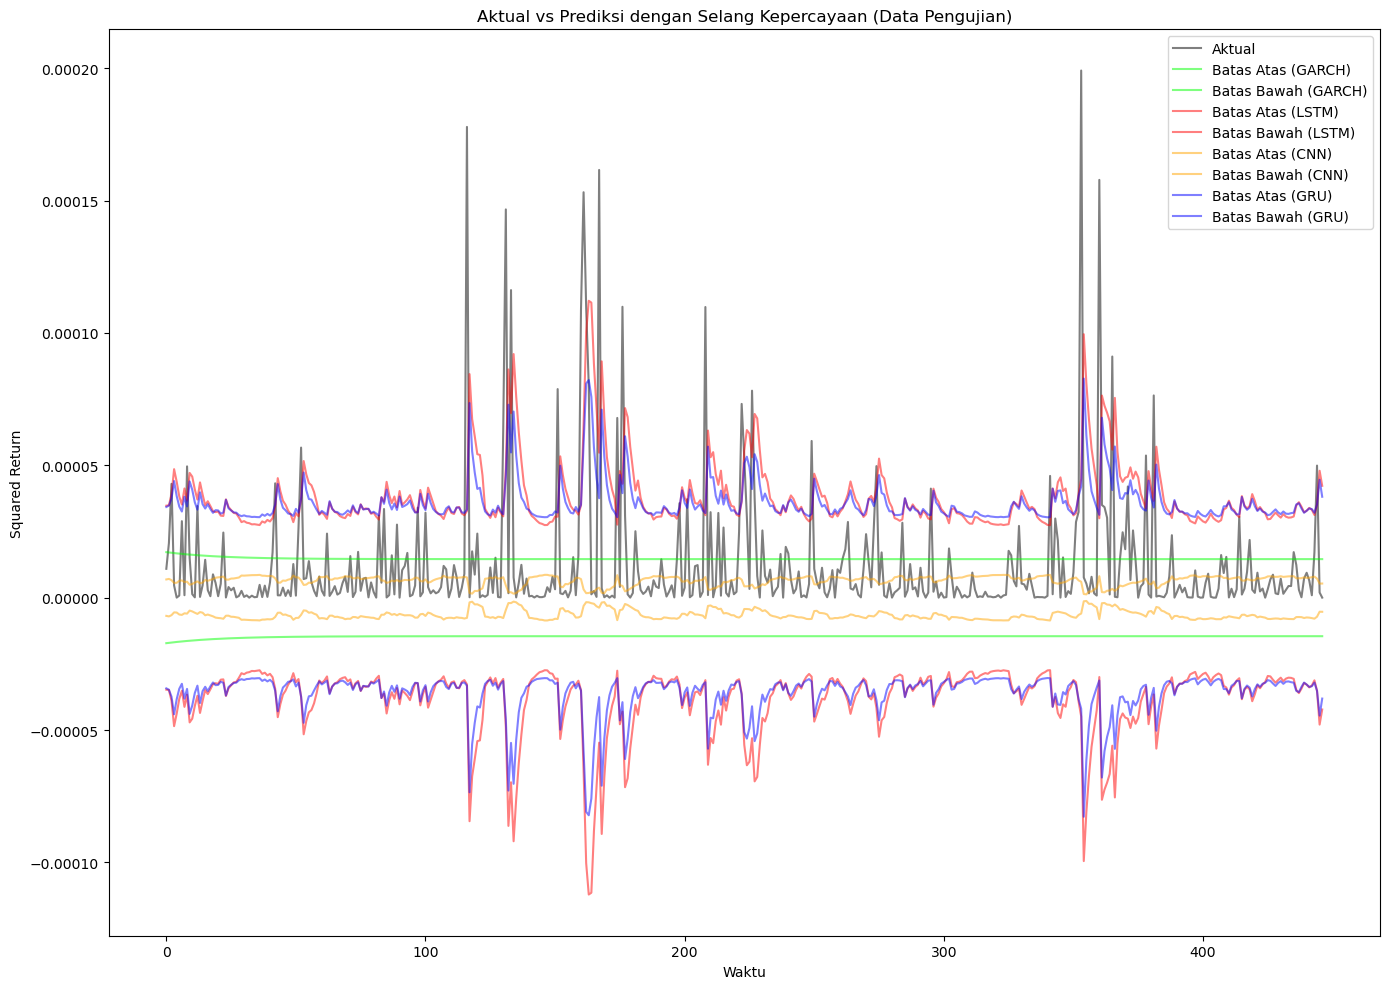

In [345]:
import numpy as np
import matplotlib.pyplot as plt

# Pastikan data dalam bentuk array NumPy (convert jika perlu)
actual_test_garch1 = np.array(actual_test_garch1)
actual_test_lstm = np.array(actual_test_lstm)
actual_test_cnn = np.array(actual_test_cnn)
actual_test_gru = np.array(actual_test_gru)
truncated_test_data_garch1 = np.array(truncated_test_data_garch1)
truncated_test_data_lstm = np.array(truncated_test_data_lstm)
truncated_test_data_cnn = np.array(truncated_test_data_cnn)
truncated_test_data_gru = np.array(truncated_test_data_gru)

# Mengambil kolom pertama dari actual_test_garch1 jika data tersebut memiliki dua kolom
if actual_test_garch1.ndim == 2:
    actual_test_garch1 = actual_test_garch1[:, 0]  # Mengubah dimensi menjadi (454,)

# Menentukan panjang yang konsisten, misalnya 447 (panjang terkecil)
min_len = 447

# Memotong semua data agar memiliki panjang yang sama
actual_test_garch1 = actual_test_garch1[:min_len]
actual_test_lstm = actual_test_lstm[:min_len]
actual_test_cnn = actual_test_cnn[:min_len]
actual_test_gru = actual_test_gru[:min_len]
truncated_test_data_garch1 = truncated_test_data_garch1[:min_len]
truncated_test_data_lstm = truncated_test_data_lstm[:min_len]
truncated_test_data_cnn = truncated_test_data_cnn[:min_len]
truncated_test_data_gru = truncated_test_data_gru[:min_len]

# Memeriksa dimensi data
print(f"Dimensi actual_test_garch1: {actual_test_garch1.shape}")
print(f"Dimensi actual_test_lstm: {actual_test_lstm.shape}")
print(f"Dimensi actual_test_cnn: {actual_test_cnn.shape}")
print(f"Dimensi actual_test_gru: {actual_test_gru.shape}")
print(f"Dimensi truncated_test_data_garch1: {truncated_test_data_garch1.shape}")
print(f"Dimensi truncated_test_data_lstm: {truncated_test_data_lstm.shape}")
print(f"Dimensi truncated_test_data_cnn: {truncated_test_data_cnn.shape}")
print(f"Dimensi truncated_test_data_gru: {truncated_test_data_gru.shape}")

# Z-score untuk selang kepercayaan 95%
confidence_interval = 1.96

# Selang kepercayaan untuk setiap model
lower_bound_garch = 0 - confidence_interval * truncated_test_data_garch1
upper_bound_garch = 0 + confidence_interval * truncated_test_data_garch1

lower_bound_lstm = 0 - confidence_interval * truncated_test_data_lstm
upper_bound_lstm = 0 + confidence_interval * truncated_test_data_lstm

lower_bound_cnn = 0 - confidence_interval * truncated_test_data_cnn
upper_bound_cnn = 0 + confidence_interval * truncated_test_data_cnn

lower_bound_gru = 0 - confidence_interval * truncated_test_data_gru
upper_bound_gru = 0 + confidence_interval * truncated_test_data_gru

# Pastikan lower_bound_* dan upper_bound_* memiliki dimensi yang benar
lower_bound_garch = np.reshape(lower_bound_garch, -1)
upper_bound_garch = np.reshape(upper_bound_garch, -1)

lower_bound_lstm = np.reshape(lower_bound_lstm, -1)
upper_bound_lstm = np.reshape(upper_bound_lstm, -1)

lower_bound_cnn = np.reshape(lower_bound_cnn, -1)
upper_bound_cnn = np.reshape(upper_bound_cnn, -1)

lower_bound_gru = np.reshape(lower_bound_gru, -1)
upper_bound_gru = np.reshape(upper_bound_gru, -1)

# Memastikan dimensi yang konsisten
print(f"Dimensi lower_bound_garch: {lower_bound_garch.shape}")
print(f"Dimensi upper_bound_garch: {upper_bound_garch.shape}")
print(f"Dimensi lower_bound_lstm: {lower_bound_lstm.shape}")
print(f"Dimensi upper_bound_lstm: {upper_bound_lstm.shape}")
print(f"Dimensi lower_bound_cnn: {lower_bound_cnn.shape}")
print(f"Dimensi upper_bound_cnn: {upper_bound_cnn.shape}")
print(f"Dimensi lower_bound_gru: {lower_bound_gru.shape}")
print(f"Dimensi upper_bound_gru: {upper_bound_gru.shape}")

# Flatten the data arrays to 1D
truncated_test_data_garch1 = truncated_test_data_garch1.squeeze()
truncated_test_data_lstm = truncated_test_data_lstm.squeeze()
truncated_test_data_cnn = truncated_test_data_cnn.squeeze()
truncated_test_data_gru = truncated_test_data_gru.squeeze()

# Now plot the data
plt.figure(figsize=(14, 10))

# Plot data aktual
plt.plot(actual_test_lstm, label="Aktual", color='black', alpha=0.5)

# Selang kepercayaan GARCH
plt.plot(upper_bound_garch, label="Batas Atas (GARCH)", color='lime', alpha=0.5)
plt.plot(lower_bound_garch, label="Batas Bawah (GARCH)", color='lime', alpha=0.5)

# Selang kepercayaan LSTM
plt.plot(upper_bound_lstm, label="Batas Atas (LSTM)", color='red', alpha=0.5)
plt.plot(lower_bound_lstm, label="Batas Bawah (LSTM)", color='red', alpha=0.5)

# Selang kepercayaan CNN
plt.plot(upper_bound_cnn, label="Batas Atas (CNN)", color='orange', alpha=0.5)
plt.plot(lower_bound_cnn, label="Batas Bawah (CNN)", color='orange', alpha=0.5)

# Selang kepercayaan GRU
plt.plot(upper_bound_gru, label="Batas Atas (GRU)", color='blue', alpha=0.5)
plt.plot(lower_bound_gru, label="Batas Bawah (GRU)", color='blue', alpha=0.5)

# Konfigurasi plot
plt.title('Aktual vs Prediksi dengan Selang Kepercayaan (Data Pengujian)')
plt.xlabel('Waktu')
plt.ylabel('Squared Return')
plt.legend()
plt.tight_layout()
plt.show()


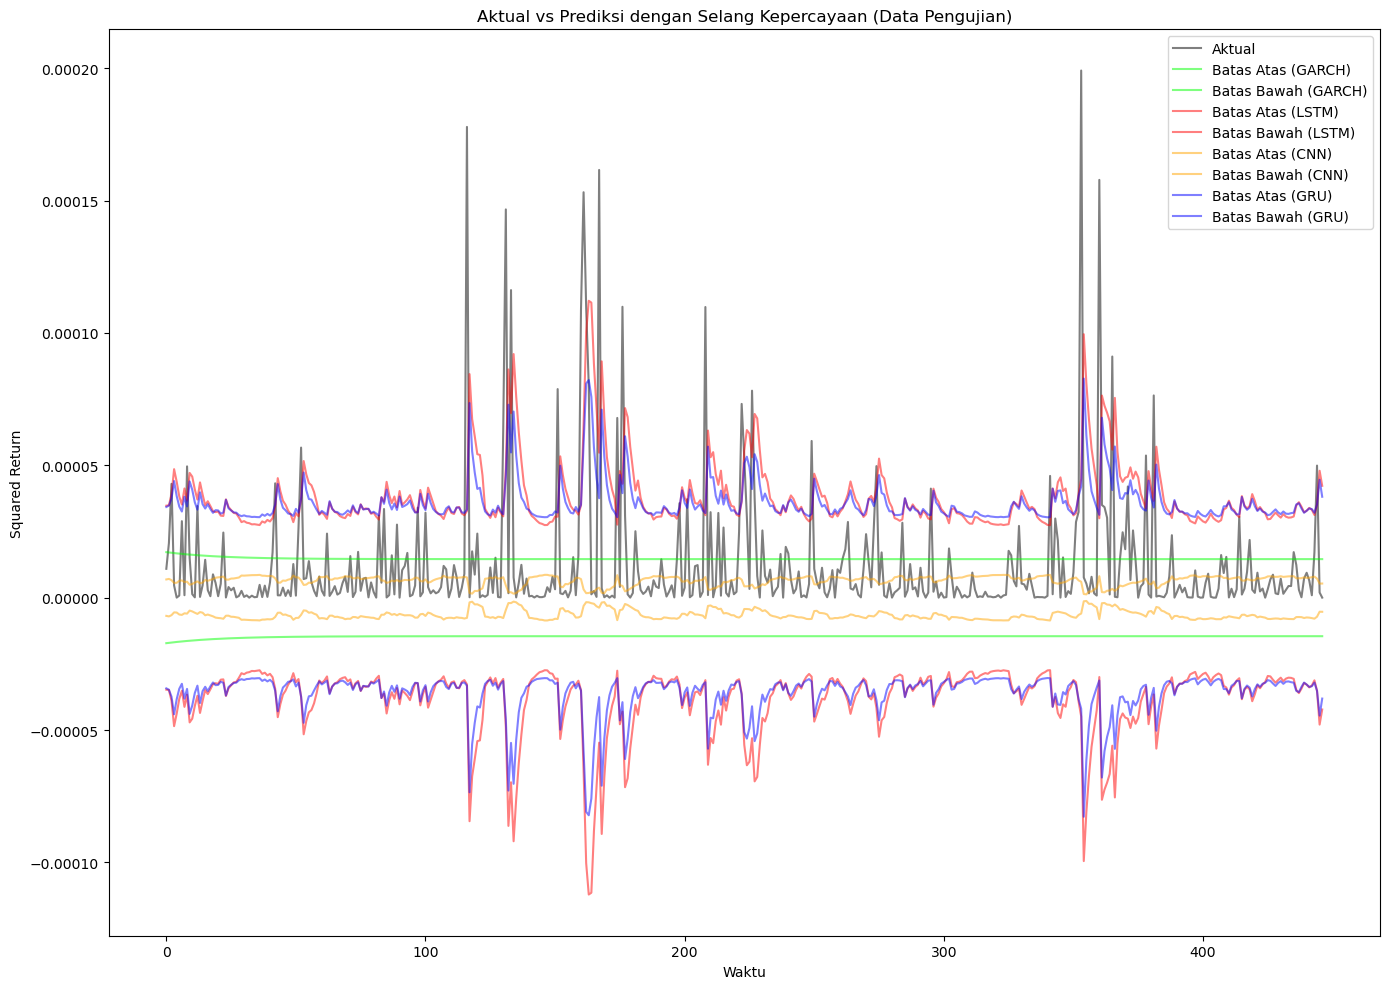

In [349]:
import numpy as np
import matplotlib.pyplot as plt

# Your existing code...
# (same code for preparing actual_test_* and truncated_test_*)

# Now plot the data
plt.figure(figsize=(14, 10))

# Plot data aktual
plt.plot(actual_test_lstm, label="Aktual", color='black', alpha=0.5)

# Selang kepercayaan GARCH
plt.plot(upper_bound_garch, label="Batas Atas (GARCH)", color='lime', alpha=0.5)
plt.plot(lower_bound_garch, label="Batas Bawah (GARCH)", color='lime', alpha=0.5)

# Selang kepercayaan LSTM
plt.plot(upper_bound_lstm, label="Batas Atas (LSTM)", color='red', alpha=0.5)
plt.plot(lower_bound_lstm, label="Batas Bawah (LSTM)", color='red', alpha=0.5)

# Selang kepercayaan CNN
plt.plot(upper_bound_cnn, label="Batas Atas (CNN)", color='orange', alpha=0.5)
plt.plot(lower_bound_cnn, label="Batas Bawah (CNN)", color='orange', alpha=0.5)

# Selang kepercayaan GRU
plt.plot(upper_bound_gru, label="Batas Atas (GRU)", color='blue', alpha=0.5)
plt.plot(lower_bound_gru, label="Batas Bawah (GRU)", color='blue', alpha=0.5)

# Konfigurasi plot
plt.title('Aktual vs Prediksi dengan Selang Kepercayaan (Data Pengujian)')
plt.xlabel('Waktu')
plt.ylabel('Squared Return')
plt.legend()
plt.tight_layout()

# Save the plot to a file (before plt.show())
plt.savefig('output_plot.png', dpi=300)  # Save as a high-quality PNG file
plt.show()


In [347]:
import numpy as np

# Fungsi untuk menghitung persentase nilai aktual dalam selang kepercayaan
def calculate_percentage_in_interval(actual, lower_bound, upper_bound):
    # Memastikan array dalam bentuk 1D
    actual = np.squeeze(actual)
    lower_bound = np.squeeze(lower_bound)
    upper_bound = np.squeeze(upper_bound)

    # Potong semua array ke panjang minimum
    min_len = min(len(actual), len(lower_bound), len(upper_bound))
    actual = actual[:min_len]
    lower_bound = lower_bound[:min_len]
    upper_bound = upper_bound[:min_len]

    # Periksa apakah nilai aktual berada di dalam selang kepercayaan
    in_interval = (actual >= lower_bound) & (actual <= upper_bound)
    
    # Hitung persentase
    percentage = (np.sum(in_interval) / min_len) * 100
    return percentage

# Hitung persentase untuk masing-masing metode
# GARCH
percentage_garch_test = calculate_percentage_in_interval(actual_test_garch1, lower_bound_garch, upper_bound_garch)
print(f"Persentase nilai dalam selang kepercayaan (GARCH) Testing: {percentage_garch_test:.2f}%")

# LSTM
percentage_lstm_test = calculate_percentage_in_interval(actual_test_lstm, lower_bound_lstm, upper_bound_lstm)
print(f"Persentase nilai dalam selang kepercayaan (LSTM) Testing: {percentage_lstm_test:.2f}%")

# CNN
percentage_cnn_test = calculate_percentage_in_interval(actual_test_cnn, lower_bound_cnn, upper_bound_cnn)
print(f"Persentase nilai dalam selang kepercayaan (CNN) Testing: {percentage_cnn_test:.2f}%")

# GRU
percentage_gru_test = calculate_percentage_in_interval(actual_test_gru, lower_bound_gru, upper_bound_gru)
print(f"Persentase nilai dalam selang kepercayaan (GRU) Testing: {percentage_gru_test:.2f}%")


Persentase nilai dalam selang kepercayaan (GARCH) Testing: 78.52%
Persentase nilai dalam selang kepercayaan (LSTM) Testing: 92.62%
Persentase nilai dalam selang kepercayaan (CNN) Testing: 63.31%
Persentase nilai dalam selang kepercayaan (GRU) Testing: 92.39%


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 4.9382e-04 - val_mean_squared_error: 4.9382e-04
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 4.2391e-04 - val_mean_squared_error: 4.2391e-04
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 4.0735e-04 - val_mean_squared_error: 4.0735e-04
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 4.6211e-04 - val_mean_squared_error: 4.6211e-04
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 4.2299e-04 - val_mean_squared_error: 4.2299e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 4.1794e-04 - val_mean_squared_error: 4.1794e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_s

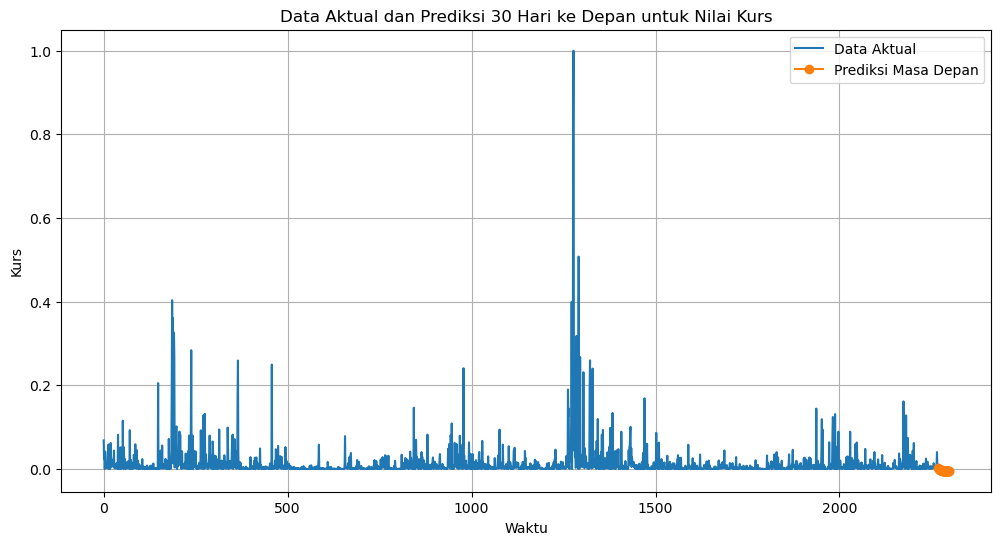

In [357]:
## PENERAPAN LSTM PADA KURS FULL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf

# Define calculation functions
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Ensure data are in the correct shape
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Gabungkan data pelatihan dan pengujian
kurs_full = np.concatenate((train_kurs, test_kurs), axis=0)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
kurs_full_scaled = scaler.fit_transform(kurs_full)

look_back = 6  # Jumlah hari sebelumnya yang digunakan untuk prediksi
train_X, train_Y = create_dataset(kurs_full_scaled, look_back)

# Reshape input to meet LSTM requirements [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

# Define the LSTM network architecture
n_steps = look_back  # Number of time steps to consider
n_features = 1  # Since it's univariate time series

my_model_BTS = Sequential()
my_model_BTS.add(LSTM(units=40, input_shape=(n_steps, n_features)))
my_model_BTS.add(Dense(1, activation='linear'))
my_model_BTS.add(Dropout(0.15))
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
my_model_BTS.compile(loss='mse', optimizer=optimizer, metrics=['mean_squared_error'])

# Fit the model
my_model_BTS.fit(train_X, train_Y, epochs=10, batch_size=32, validation_split=0.2)

# Fungsi untuk membuat prediksi masa depan
def predict_future(model, last_sequence, future_steps, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_prediction = model.predict(current_sequence.reshape(1, n_steps, n_features))
        predictions.append(next_prediction[0, 0])
        
        # Perbarui urutan saat ini: hapus nilai pertama dan tambahkan prediksi baru
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_sequence = np.append(current_sequence[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inversi transformasi prediksi ke skala asli
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    return predictions

# Ambil `look_back` hari terakhir dari data penuh untuk memulai prediksi masa depan
last_sequence = kurs_full_scaled[-look_back:].reshape(1, look_back, 1)

# Prediksi 30 hari ke depan
future_steps = 30
future_predictions = predict_future(my_model_BTS, last_sequence, future_steps, scaler)

# Cetak prediksi masa depan
print("Prediksi 30 hari ke depan:", future_predictions)

# Gabungkan data aktual dan prediksi masa depan
full_actual = scaler.inverse_transform(kurs_full_scaled)
combined_data = np.concatenate((full_actual, future_predictions), axis=0)

# Plot data aktual dan prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(full_actual, label='Data Aktual')
plt.plot(np.arange(len(full_actual), len(full_actual) + future_steps), future_predictions,marker='o', label='Prediksi Masa Depan')
plt.title('Data Aktual dan Prediksi 30 Hari ke Depan untuk Nilai Kurs')
plt.xlabel('Waktu')
plt.ylabel('Kurs')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 4.2656e-04 - val_mean_squared_error: 4.2656e-04
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 4.2212e-04 - val_mean_squared_error: 4.2212e-04
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 4.2137e-04 - val_mean_squared_error: 4.2137e-04
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 4.1992e-04 - val_mean_squared_error: 4.1992e-04
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 4.2038e-04 - val_mean_squared_error: 4.2038e-04
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 4.1925e-04 - val_mean_squared_error: 4.1925e-04
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - mean_

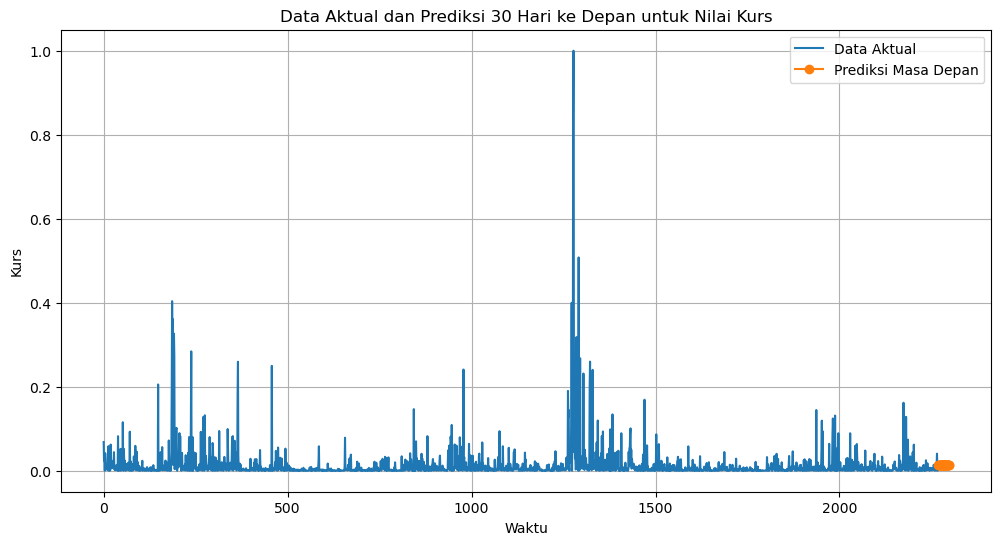

In [359]:
## PENERAPAN GRU PADA KURS FULL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Fungsi untuk menghitung MAPE, MSE, RMSE, dan MAE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

def calculate_mse(actual, predicted):
    return np.square(np.subtract(actual, predicted)).mean()

def calculate_rmse(actual, predicted):
    return np.sqrt(calculate_mse(actual, predicted))

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Fungsi untuk mengatur seed untuk reprodusibilitas
def set_seed(seed=16):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

# Fungsi untuk membuat dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Gabungkan data pelatihan dan pengujian
kurs_full = np.concatenate((train_kurs, test_kurs), axis=0)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
kurs_full_scaled = scaler.fit_transform(kurs_full)

look_back = 6  # Jumlah hari sebelumnya yang digunakan untuk prediksi
train_X, train_Y = create_dataset(kurs_full_scaled, look_back)

# Reshape input to meet GRU requirements [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

# Definisikan hyperparameter terbaik
best_learning_rate = 0.0001
best_units = 64

# Membangun model dengan hyperparameter terbaik
def build_best_model():
    model = Sequential()
    model.add(GRU(units=best_units, activation='relu', input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])
    return model

# Membangun model dengan hyperparameter terbaik
best_model = build_best_model()

# Melatih model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = best_model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Fungsi untuk membuat prediksi masa depan
def predict_future(model, last_sequence, future_steps, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(future_steps):
        next_prediction = model.predict(current_sequence.reshape(1, look_back, 1))
        predictions.append(next_prediction[0, 0])
        
        # Perbarui urutan saat ini: hapus nilai pertama dan tambahkan prediksi baru
        next_prediction_reshaped = next_prediction.reshape(1, 1, 1)
        current_sequence = np.append(current_sequence[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inversi transformasi prediksi ke skala asli
    predictions = np.array(predictions).reshape(-1, 1)
    predictions = scaler.inverse_transform(predictions)

    return predictions

# Ambil `look_back` hari terakhir dari data penuh untuk memulai prediksi masa depan
last_sequence = kurs_full_scaled[-look_back:].reshape(1, look_back, 1)

# Prediksi 30 hari ke depan
future_steps = 30
future_predictions = predict_future(best_model, last_sequence, future_steps, scaler)

# Cetak prediksi masa depan
print("Prediksi 30 hari ke depan:", future_predictions)

# Gabungkan data aktual dan prediksi masa depan
full_actual = scaler.inverse_transform(kurs_full_scaled)
combined_data = np.concatenate((full_actual, future_predictions), axis=0)

# Plot data aktual dan prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(full_actual, label='Data Aktual')
plt.plot(np.arange(len(full_actual), len(full_actual) + future_steps), future_predictions, marker='o', label='Prediksi Masa Depan')
plt.title('Data Aktual dan Prediksi 30 Hari ke Depan untuk Nilai Kurs')
plt.xlabel('Waktu')
plt.ylabel('Kurs')DD
plt.legend()
plt.grid(True)
plt.show()